In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
google=pd.read_csv('C:\\Users\\manis\\Downloads\\googleplaystore.csv')
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
google.duplicated().sum()

483

In [4]:
google.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
gl=google.fillna(method="bfill")

In [6]:
gl.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
gl.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


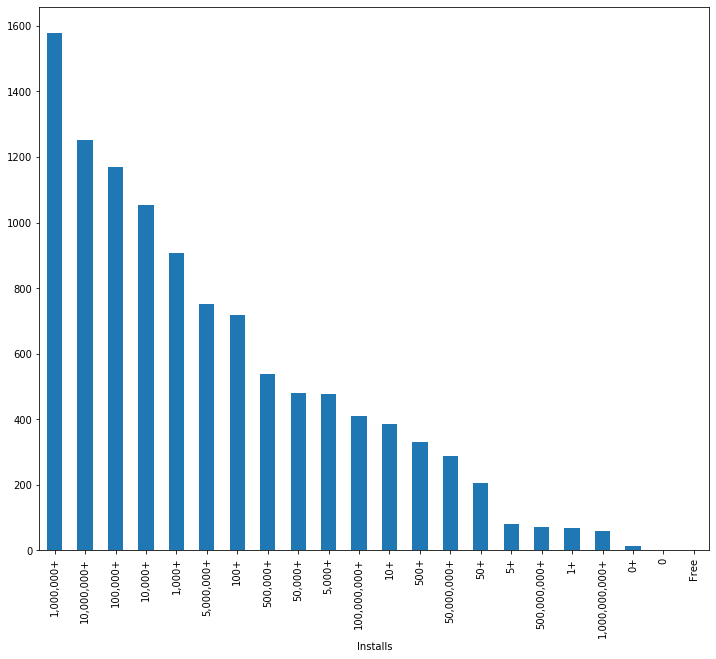

In [8]:
plt.figure(figsize=(12,10))
gl['Installs'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel("Installs")
plt.show()

In [9]:
gl['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
8 Ball Pool                                          7
Candy Crush Saga                                     7
                                                    ..
Lazionews.eu                                         1
DB TOS - Pocket Helper                               1
Baritastic - Bariatric Tracker                       1
Thrive CF                                            1
IZ2UUF Morse Koch CW                                 1
Name: App, Length: 9660, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [11]:
for col in gl.columns:
    if gl[col].dtypes == 'object':
        gl[col] = le.fit_transform(gl[col])

In [12]:
gl.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,6963,1,4.1,1182,54,7,1,91,1,9,561,118,15
1,2632,1,3.9,5923,28,19,1,91,1,12,481,1018,15
2,8657,1,4.7,5680,367,14,1,91,1,9,116,464,15
3,7828,1,4.5,1946,100,17,1,91,4,9,824,2765,18
4,7023,1,4.3,5923,63,10,1,91,1,11,756,277,20


In [13]:
gl.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,8174,12,4.5,3471,239,13,1,91,1,39,645,638,17
10837,4609,12,5.0,3588,124,9,1,91,1,39,691,113,17
10838,6892,21,4.5,2854,413,3,1,91,1,72,505,113,7
10839,8395,4,4.5,355,461,3,1,91,3,19,496,2765,32
10840,9487,19,4.5,3579,54,8,1,91,1,68,646,2765,32


In [14]:
d=gl.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1)

In [15]:
d.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,1,4.1,1182,54,7,1,91,1,9
1,1,3.9,5923,28,19,1,91,1,12
2,1,4.7,5680,367,14,1,91,1,9
3,1,4.5,1946,100,17,1,91,4,9
4,1,4.3,5923,63,10,1,91,1,11


In [16]:
gl['Category'].value_counts()

12    1972
15    1144
30     843
21     463
5      460
26     424
24     392
7      387
29     384
19     382
13     366
16     341
25     335
28     295
22     283
27     260
31     258
8      234
4      231
32     175
9      156
10     149
20     137
14     127
17      88
18      85
2       85
33      82
1       65
11      64
23      60
6       60
3       53
0        1
Name: Category, dtype: int64

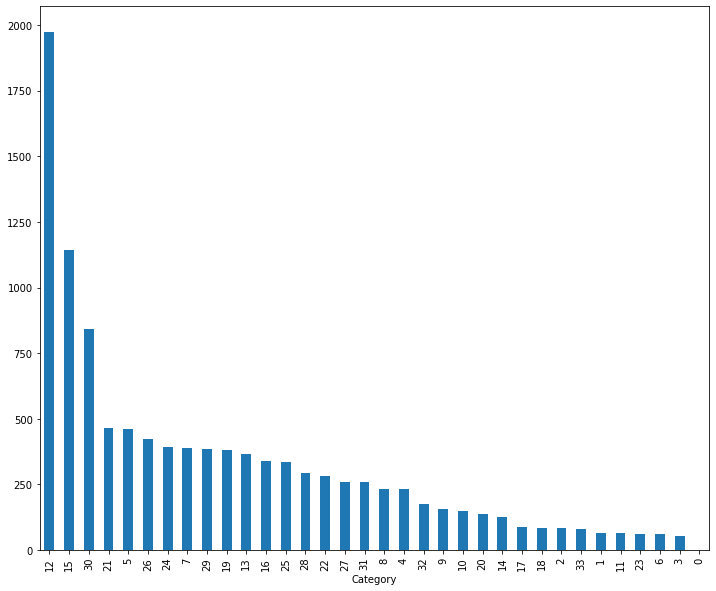

In [17]:
plt.figure(figsize=(12,10))
gl['Category'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.show()

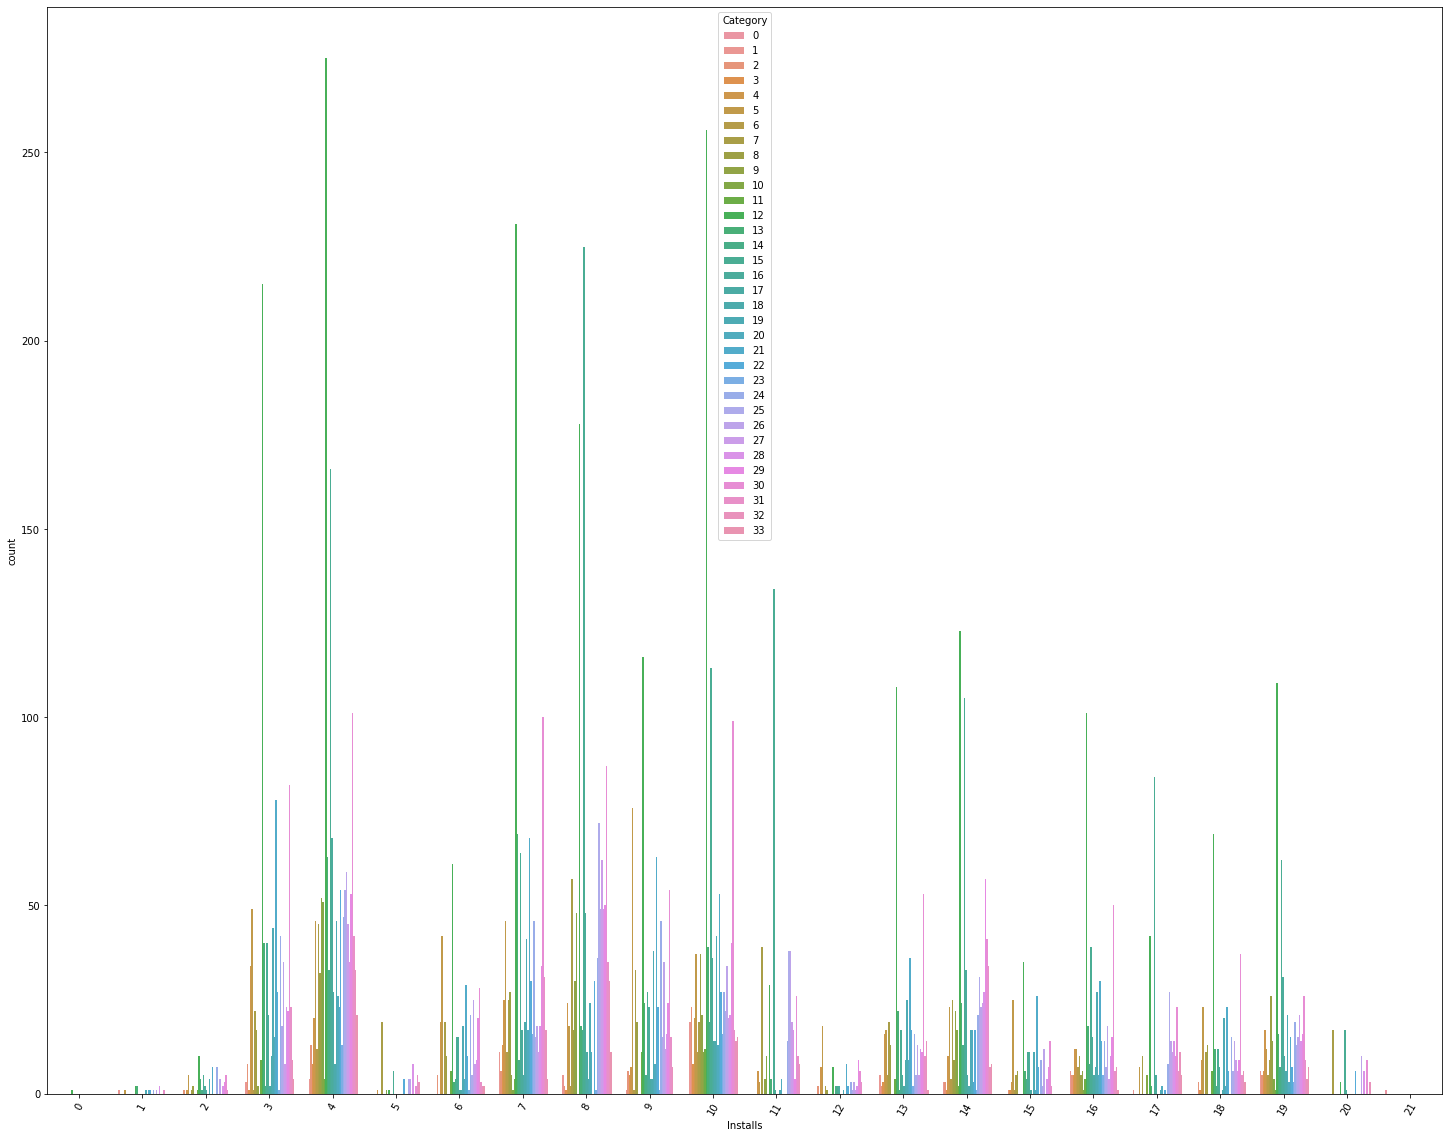

In [18]:
plt.figure(figsize=(25,20))
sns.countplot(x='Installs',hue='Category',data=d)
plt.xticks(rotation=60)
plt.show()

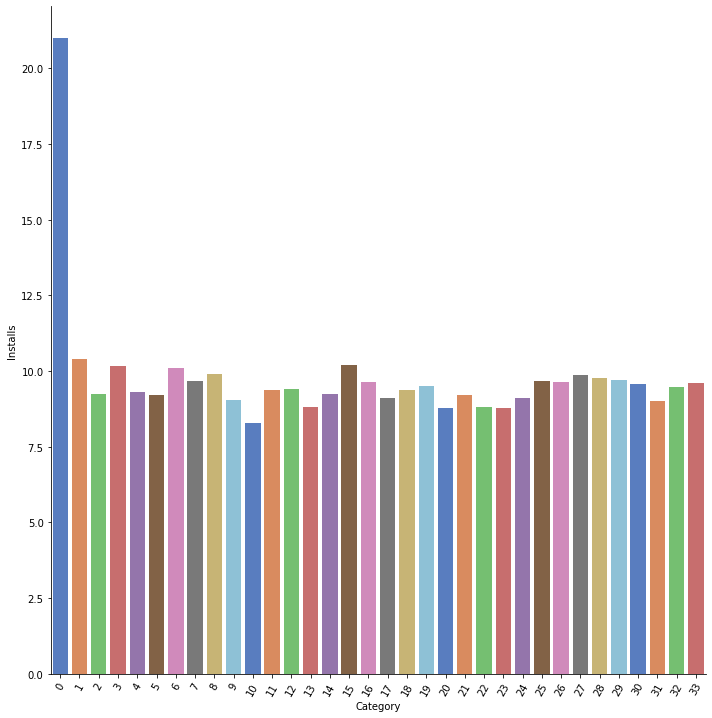

In [19]:
sns.catplot(x="Category", y="Installs", data=d, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

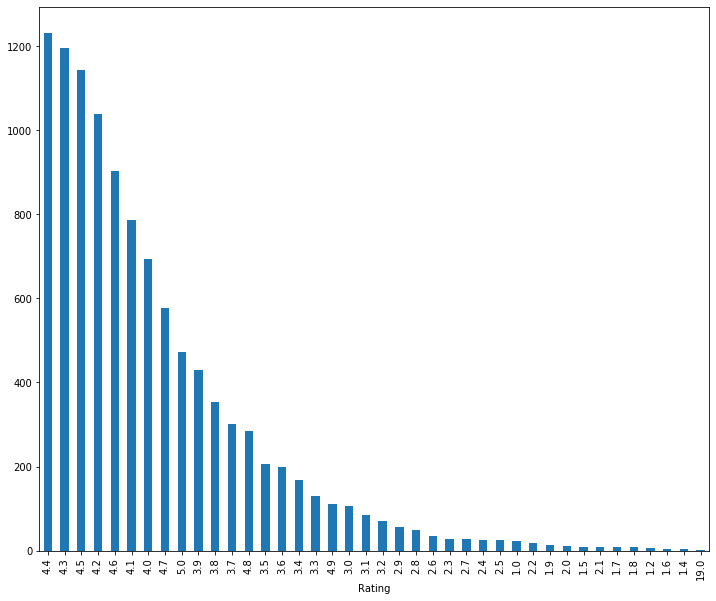

In [20]:
plt.figure(figsize=(12,10))
gl['Rating'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel("Rating")
plt.show()

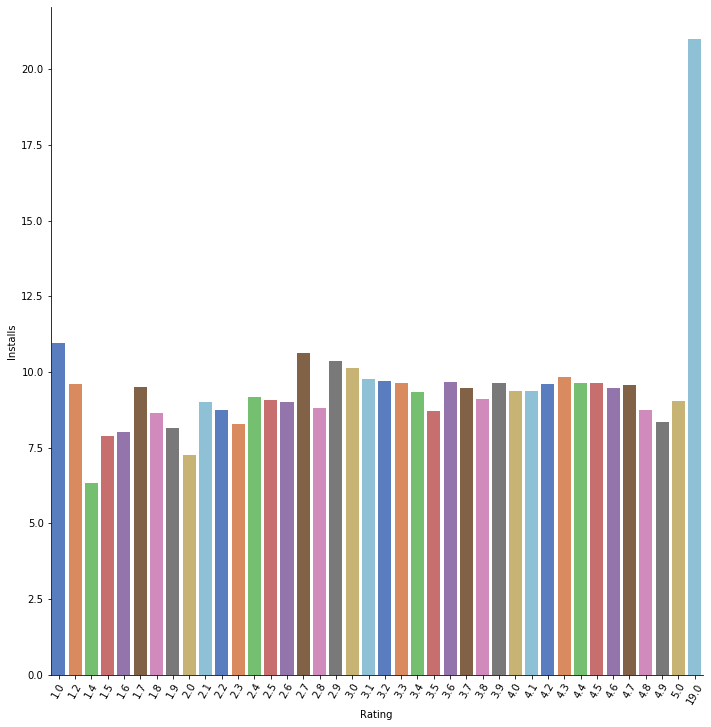

In [21]:
sns.catplot(x="Rating", y="Installs", data=d, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

In [22]:
d.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,1,4.1,1182,54,7,1,91,1,9
1,1,3.9,5923,28,19,1,91,1,12
2,1,4.7,5680,367,14,1,91,1,9
3,1,4.5,1946,100,17,1,91,4,9
4,1,4.3,5923,63,10,1,91,1,11


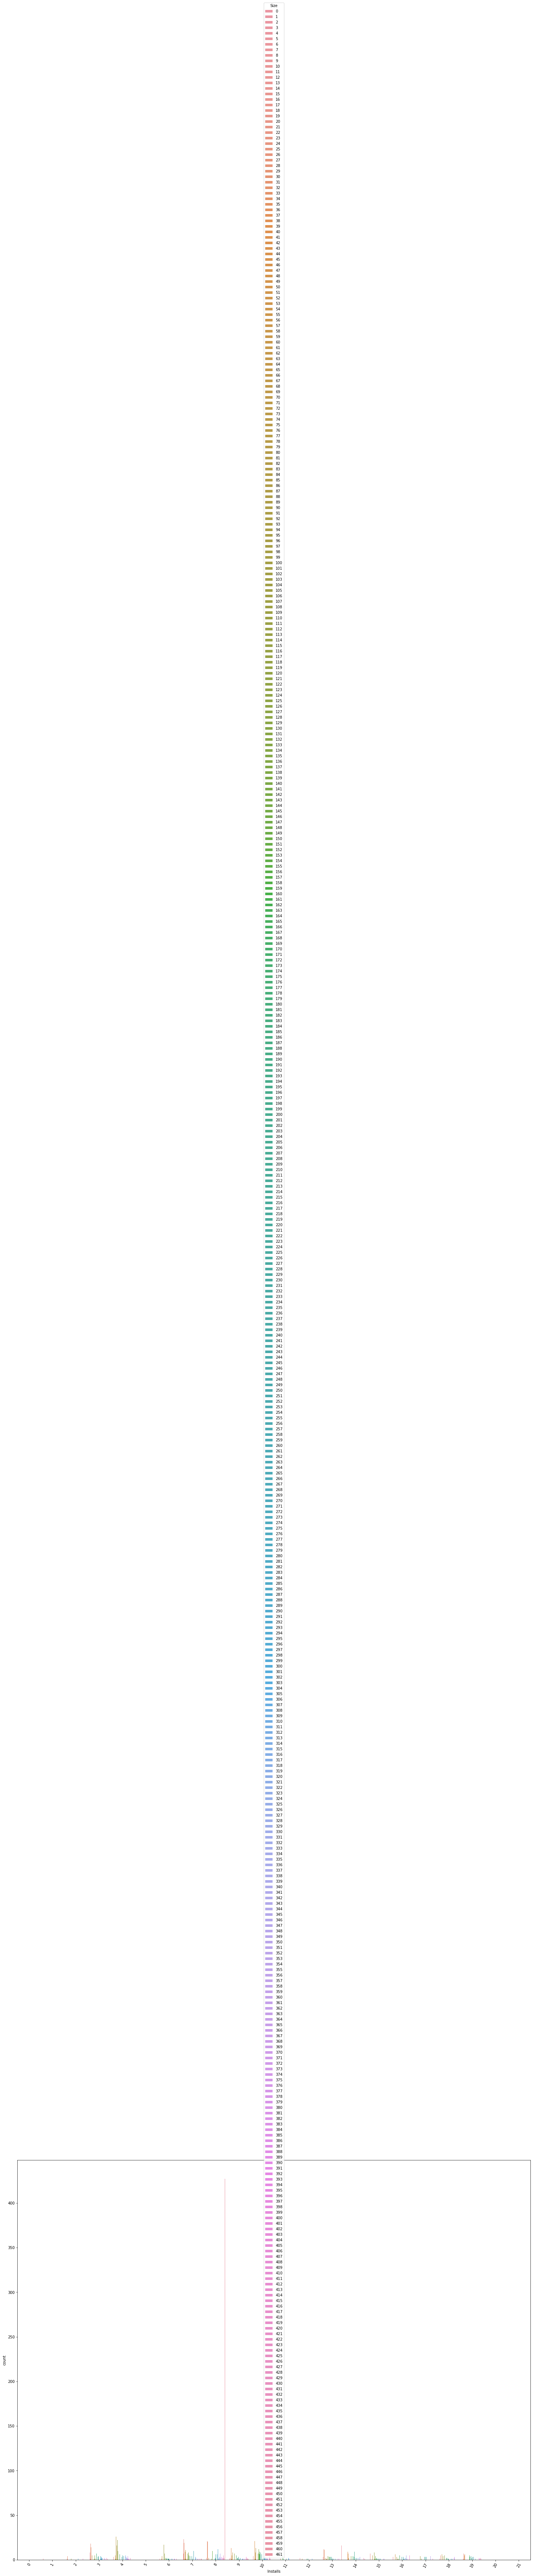

In [23]:
plt.figure(figsize=(25,20))
sns.countplot(x='Installs',hue='Size',data=d)
plt.xticks(rotation=60)
plt.show()

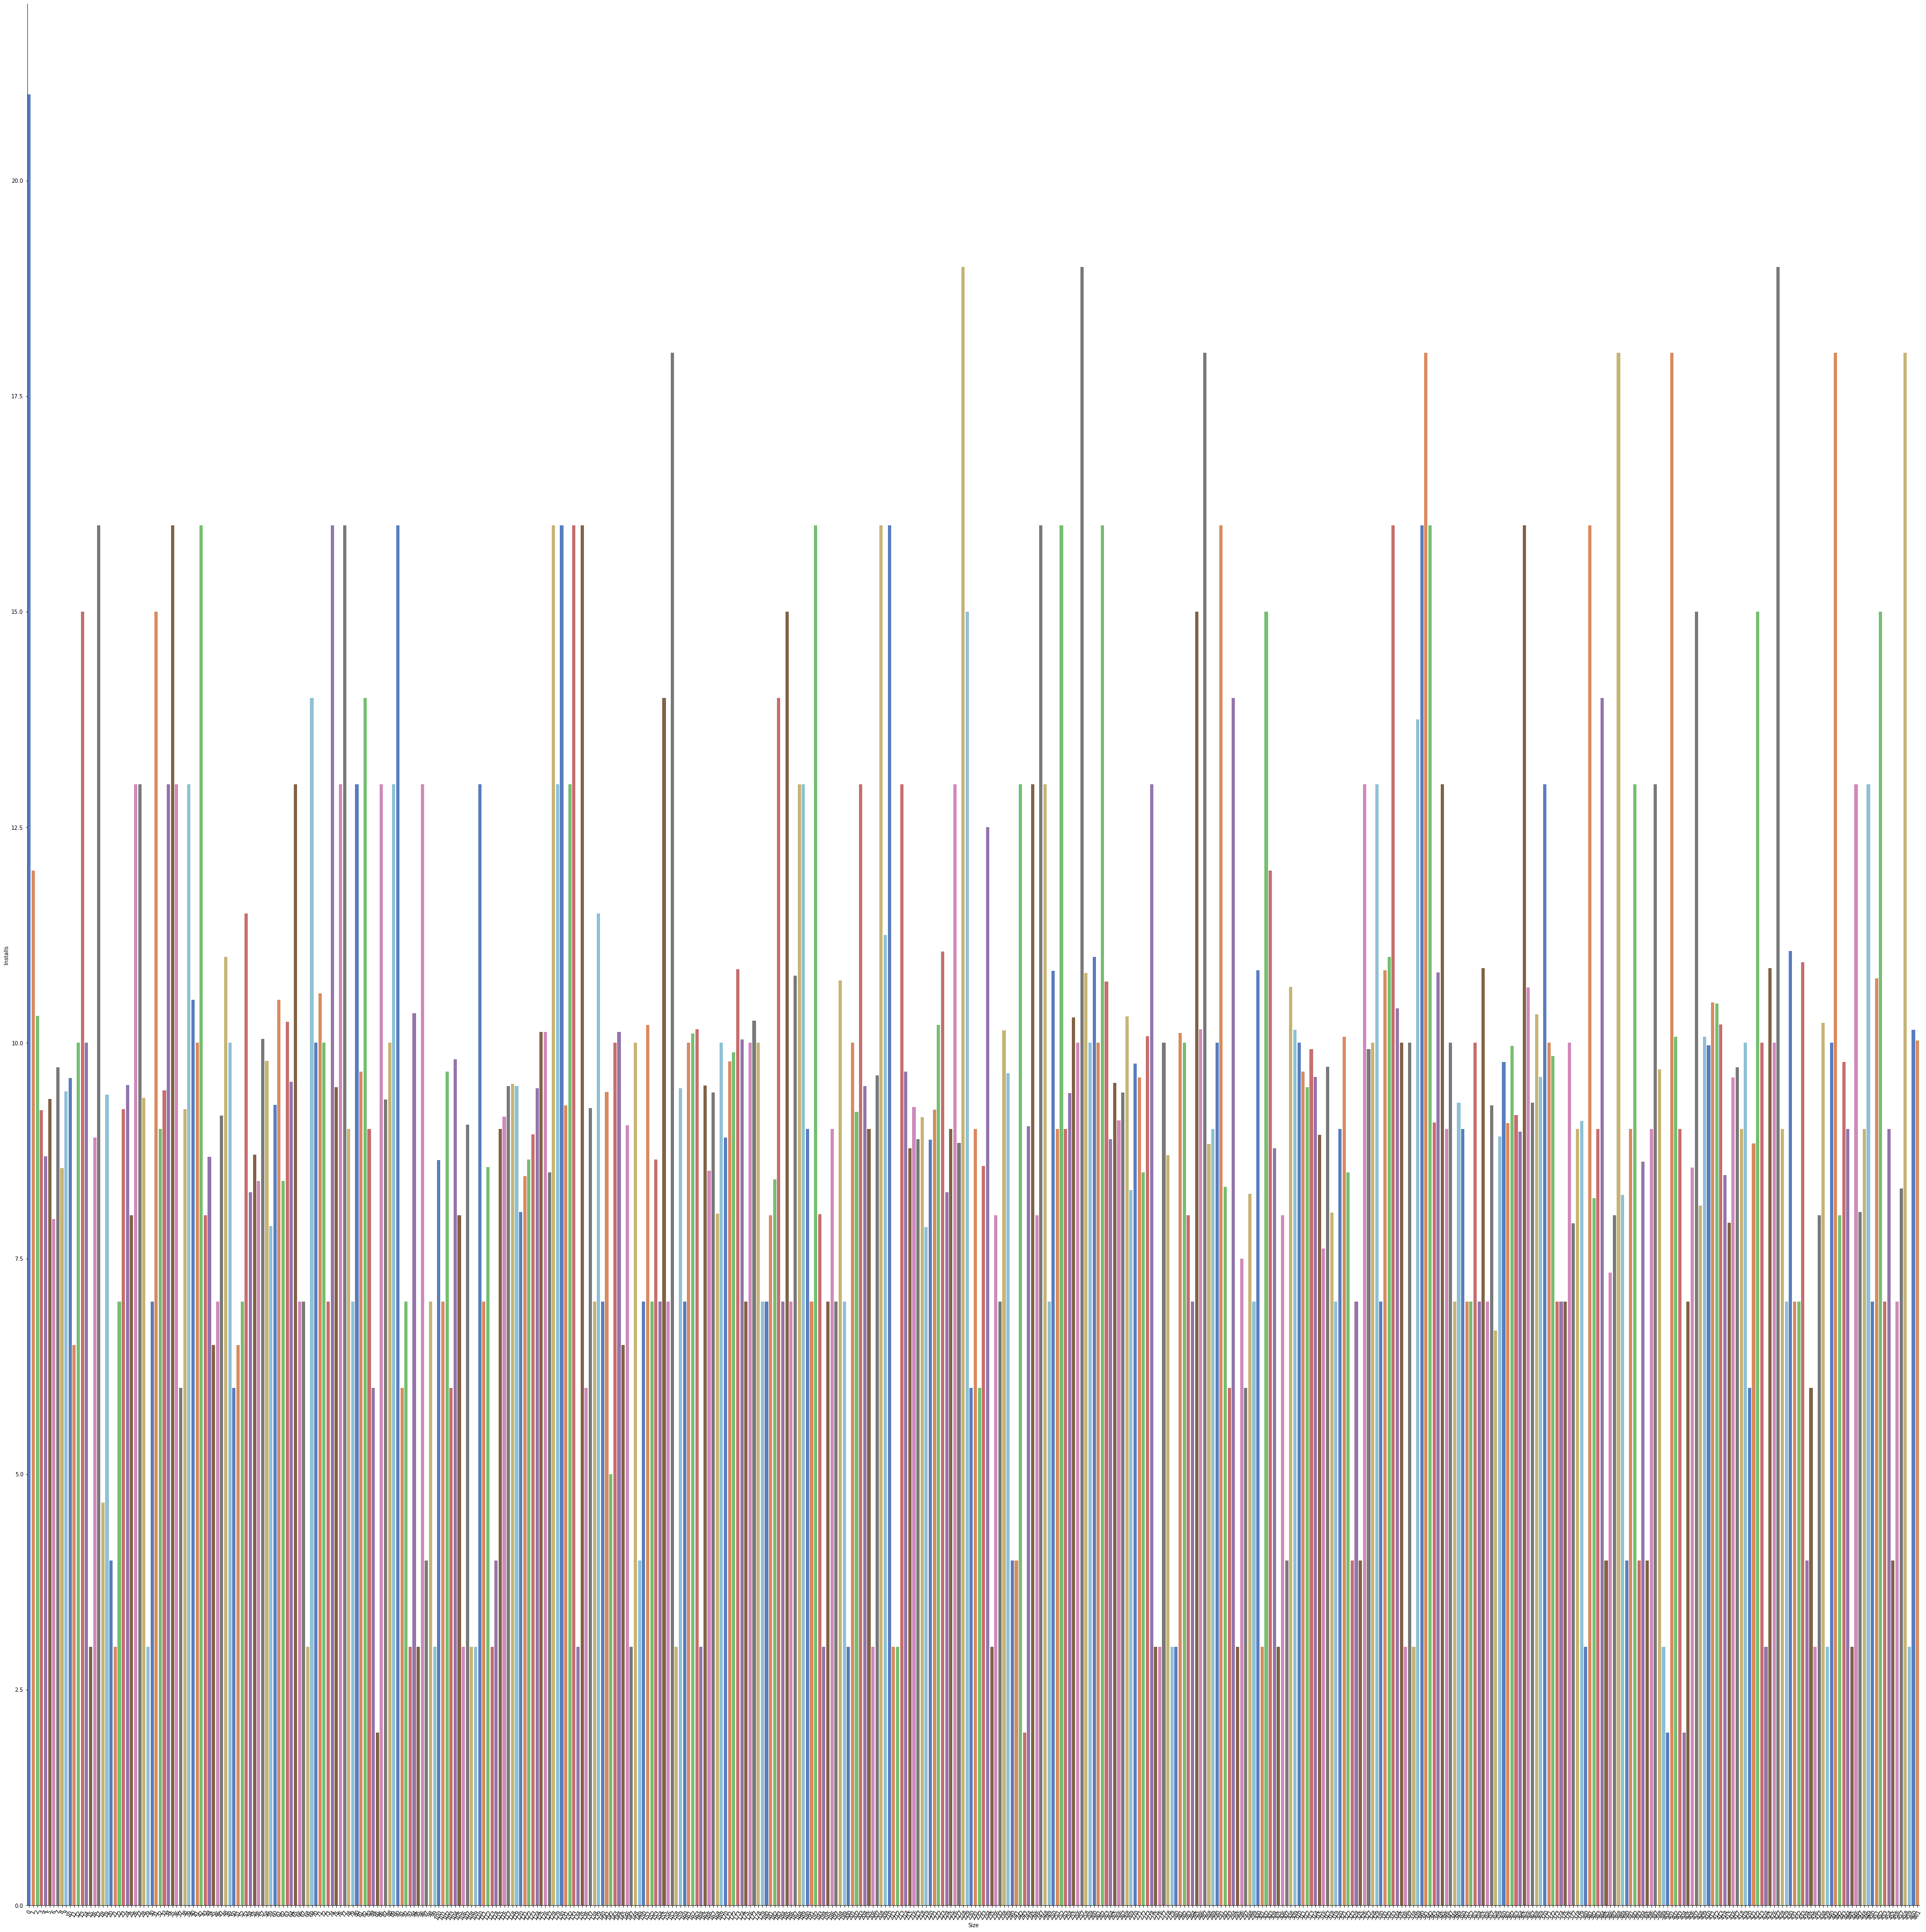

In [24]:
sns.catplot(x="Size", y="Installs", data=d, kind="bar",height=50, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

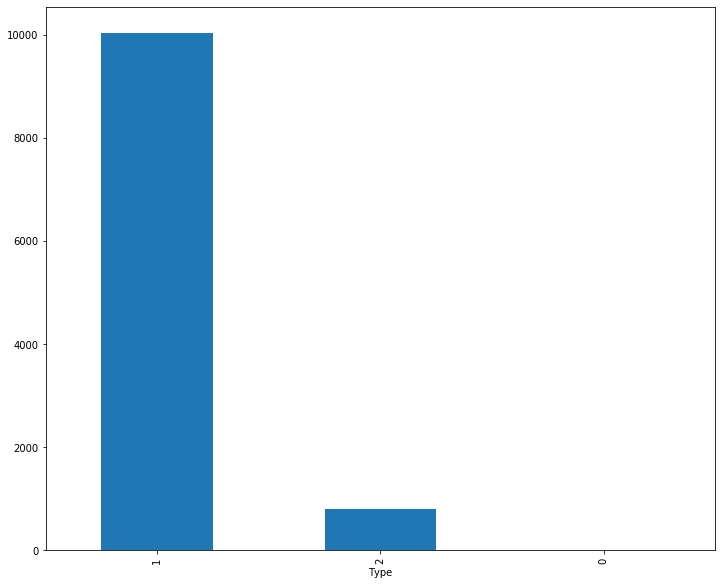

In [25]:
plt.figure(figsize=(12,10))
gl['Type'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel("Type")
plt.show()

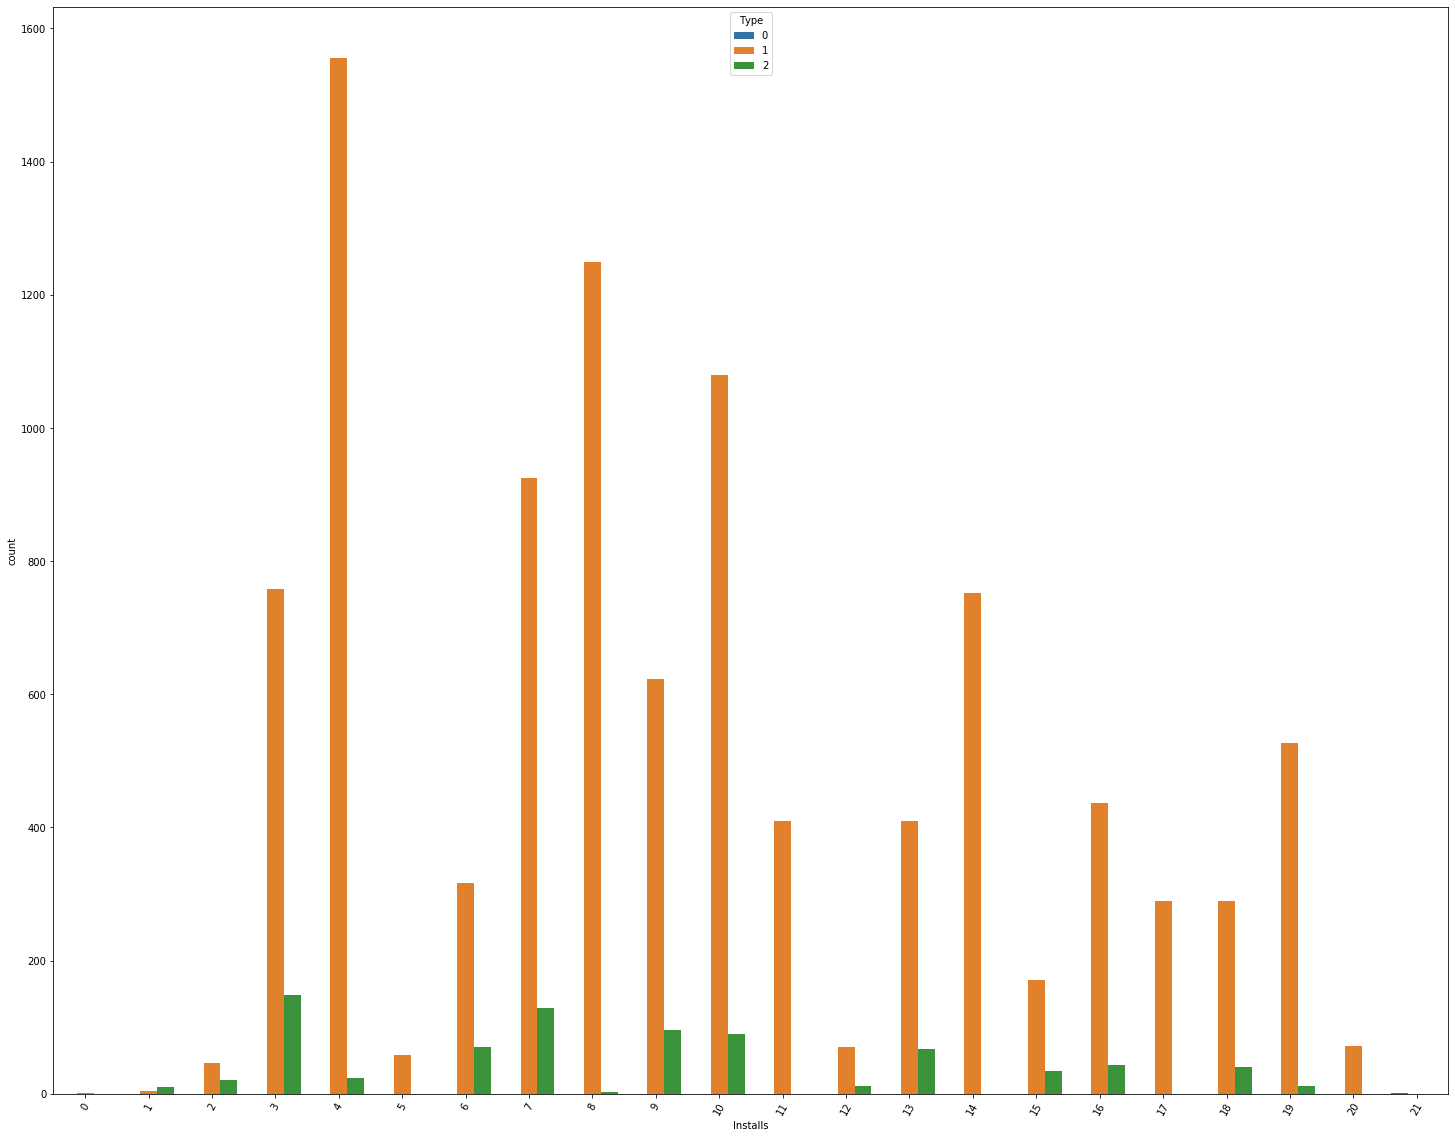

In [26]:
plt.figure(figsize=(25,20))
sns.countplot(x='Installs',hue='Type',data=d)
plt.xticks(rotation=60)
plt.show()

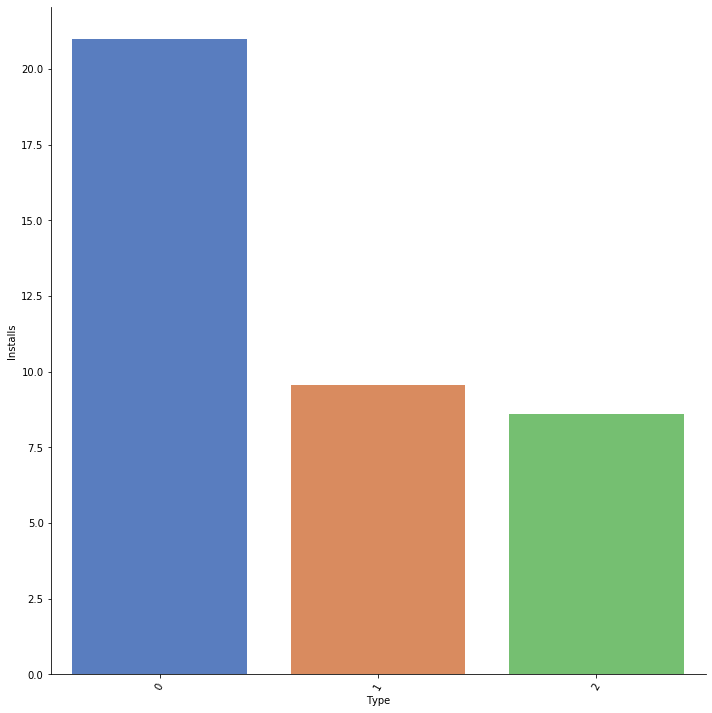

In [27]:
sns.catplot(x="Type", y="Installs", data=d, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

In [28]:
d.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,1,4.1,1182,54,7,1,91,1,9
1,1,3.9,5923,28,19,1,91,1,12
2,1,4.7,5680,367,14,1,91,1,9
3,1,4.5,1946,100,17,1,91,4,9
4,1,4.3,5923,63,10,1,91,1,11


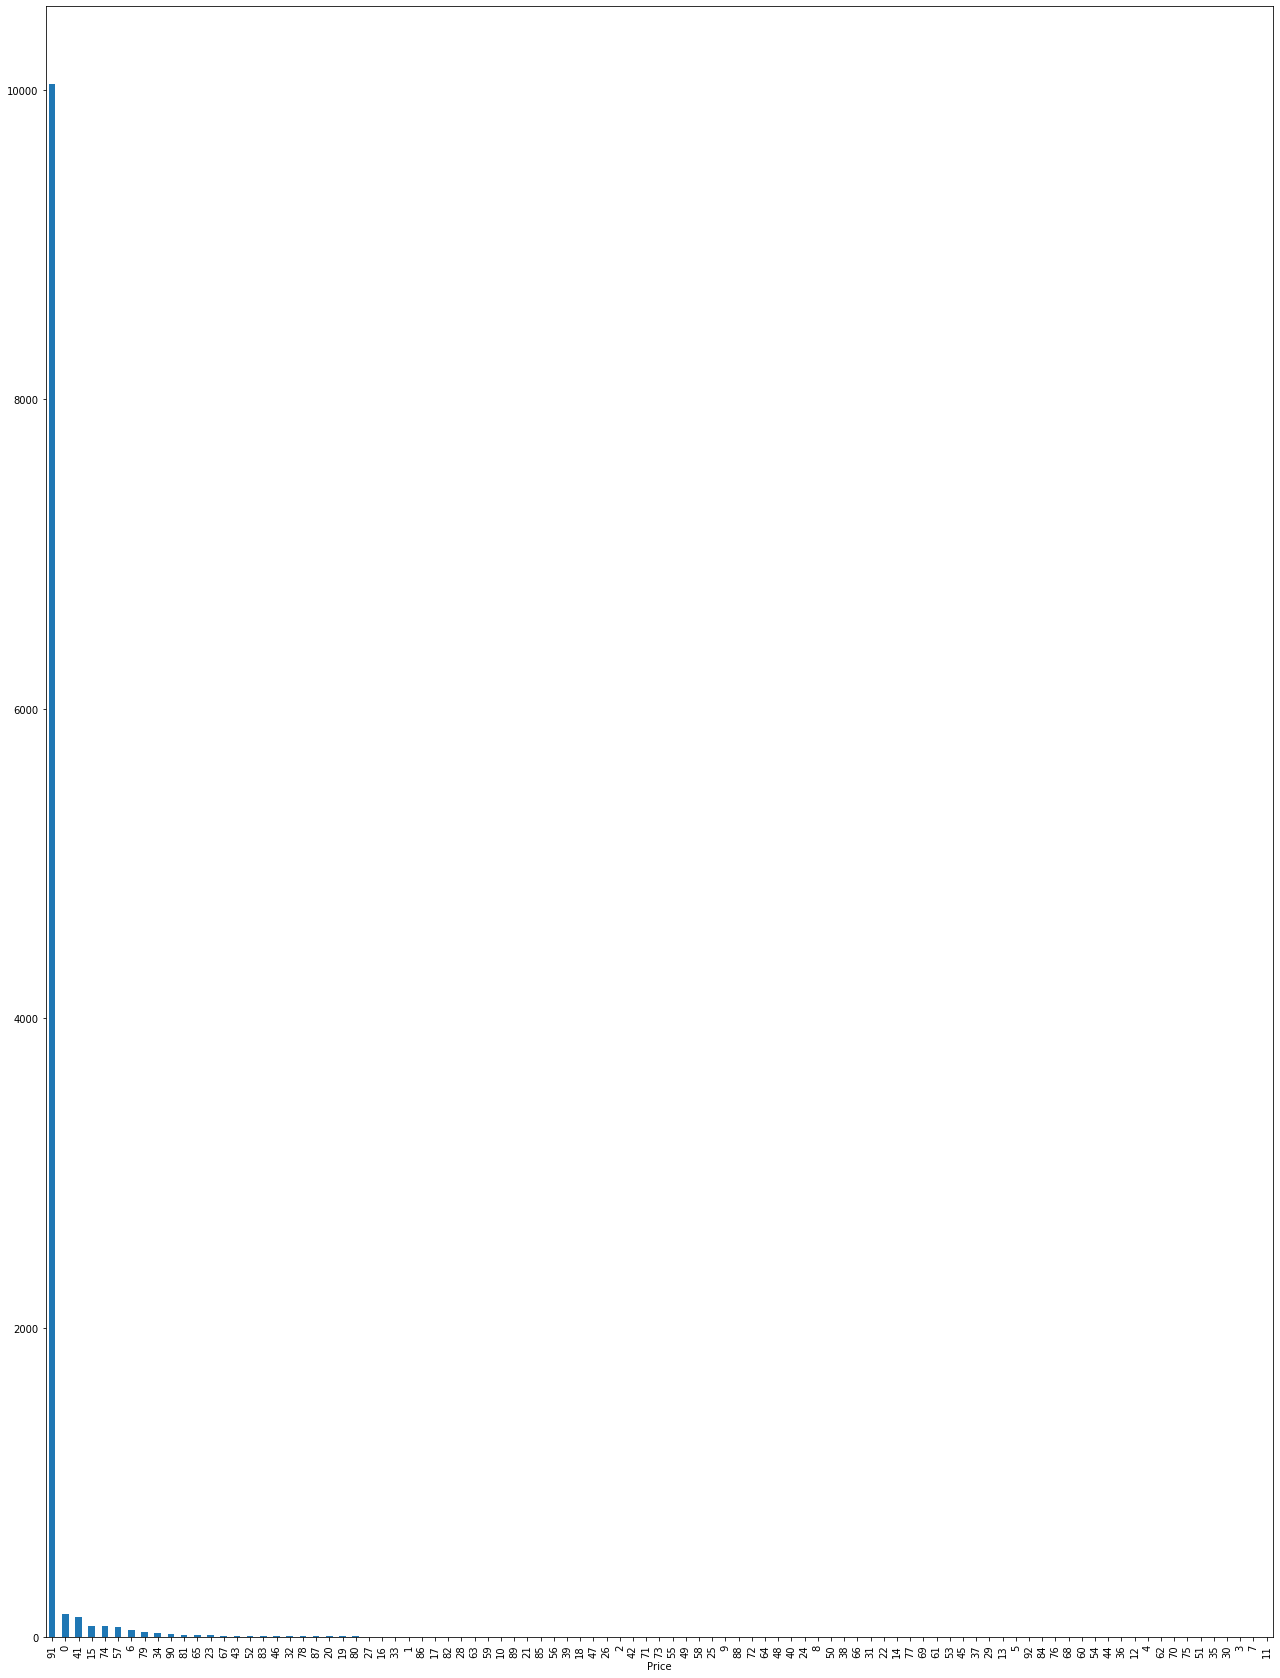

In [29]:
plt.figure(figsize=(22,30))
gl['Price'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel("Price")
plt.show()

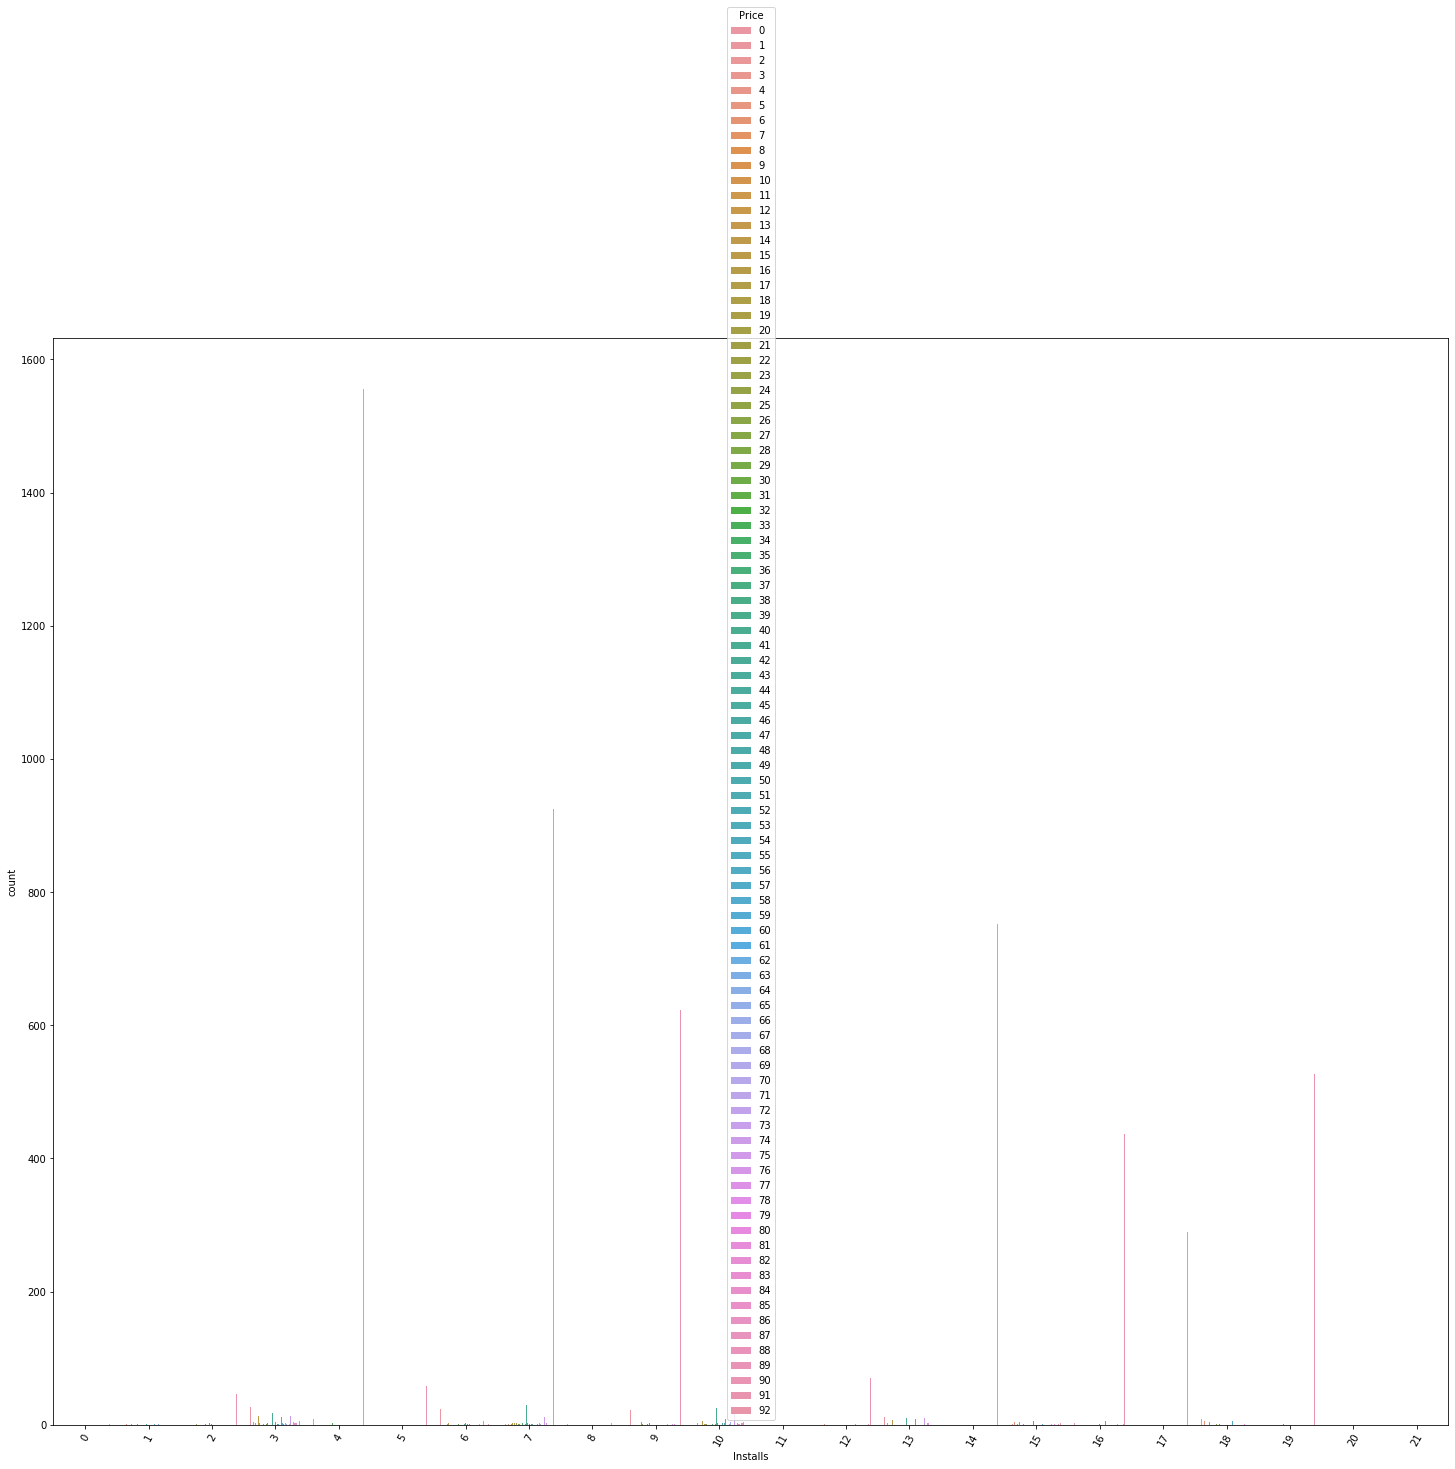

In [30]:
plt.figure(figsize=(25,20))
sns.countplot(x='Installs',hue='Price',data=d)
plt.xticks(rotation=60)
plt.show()

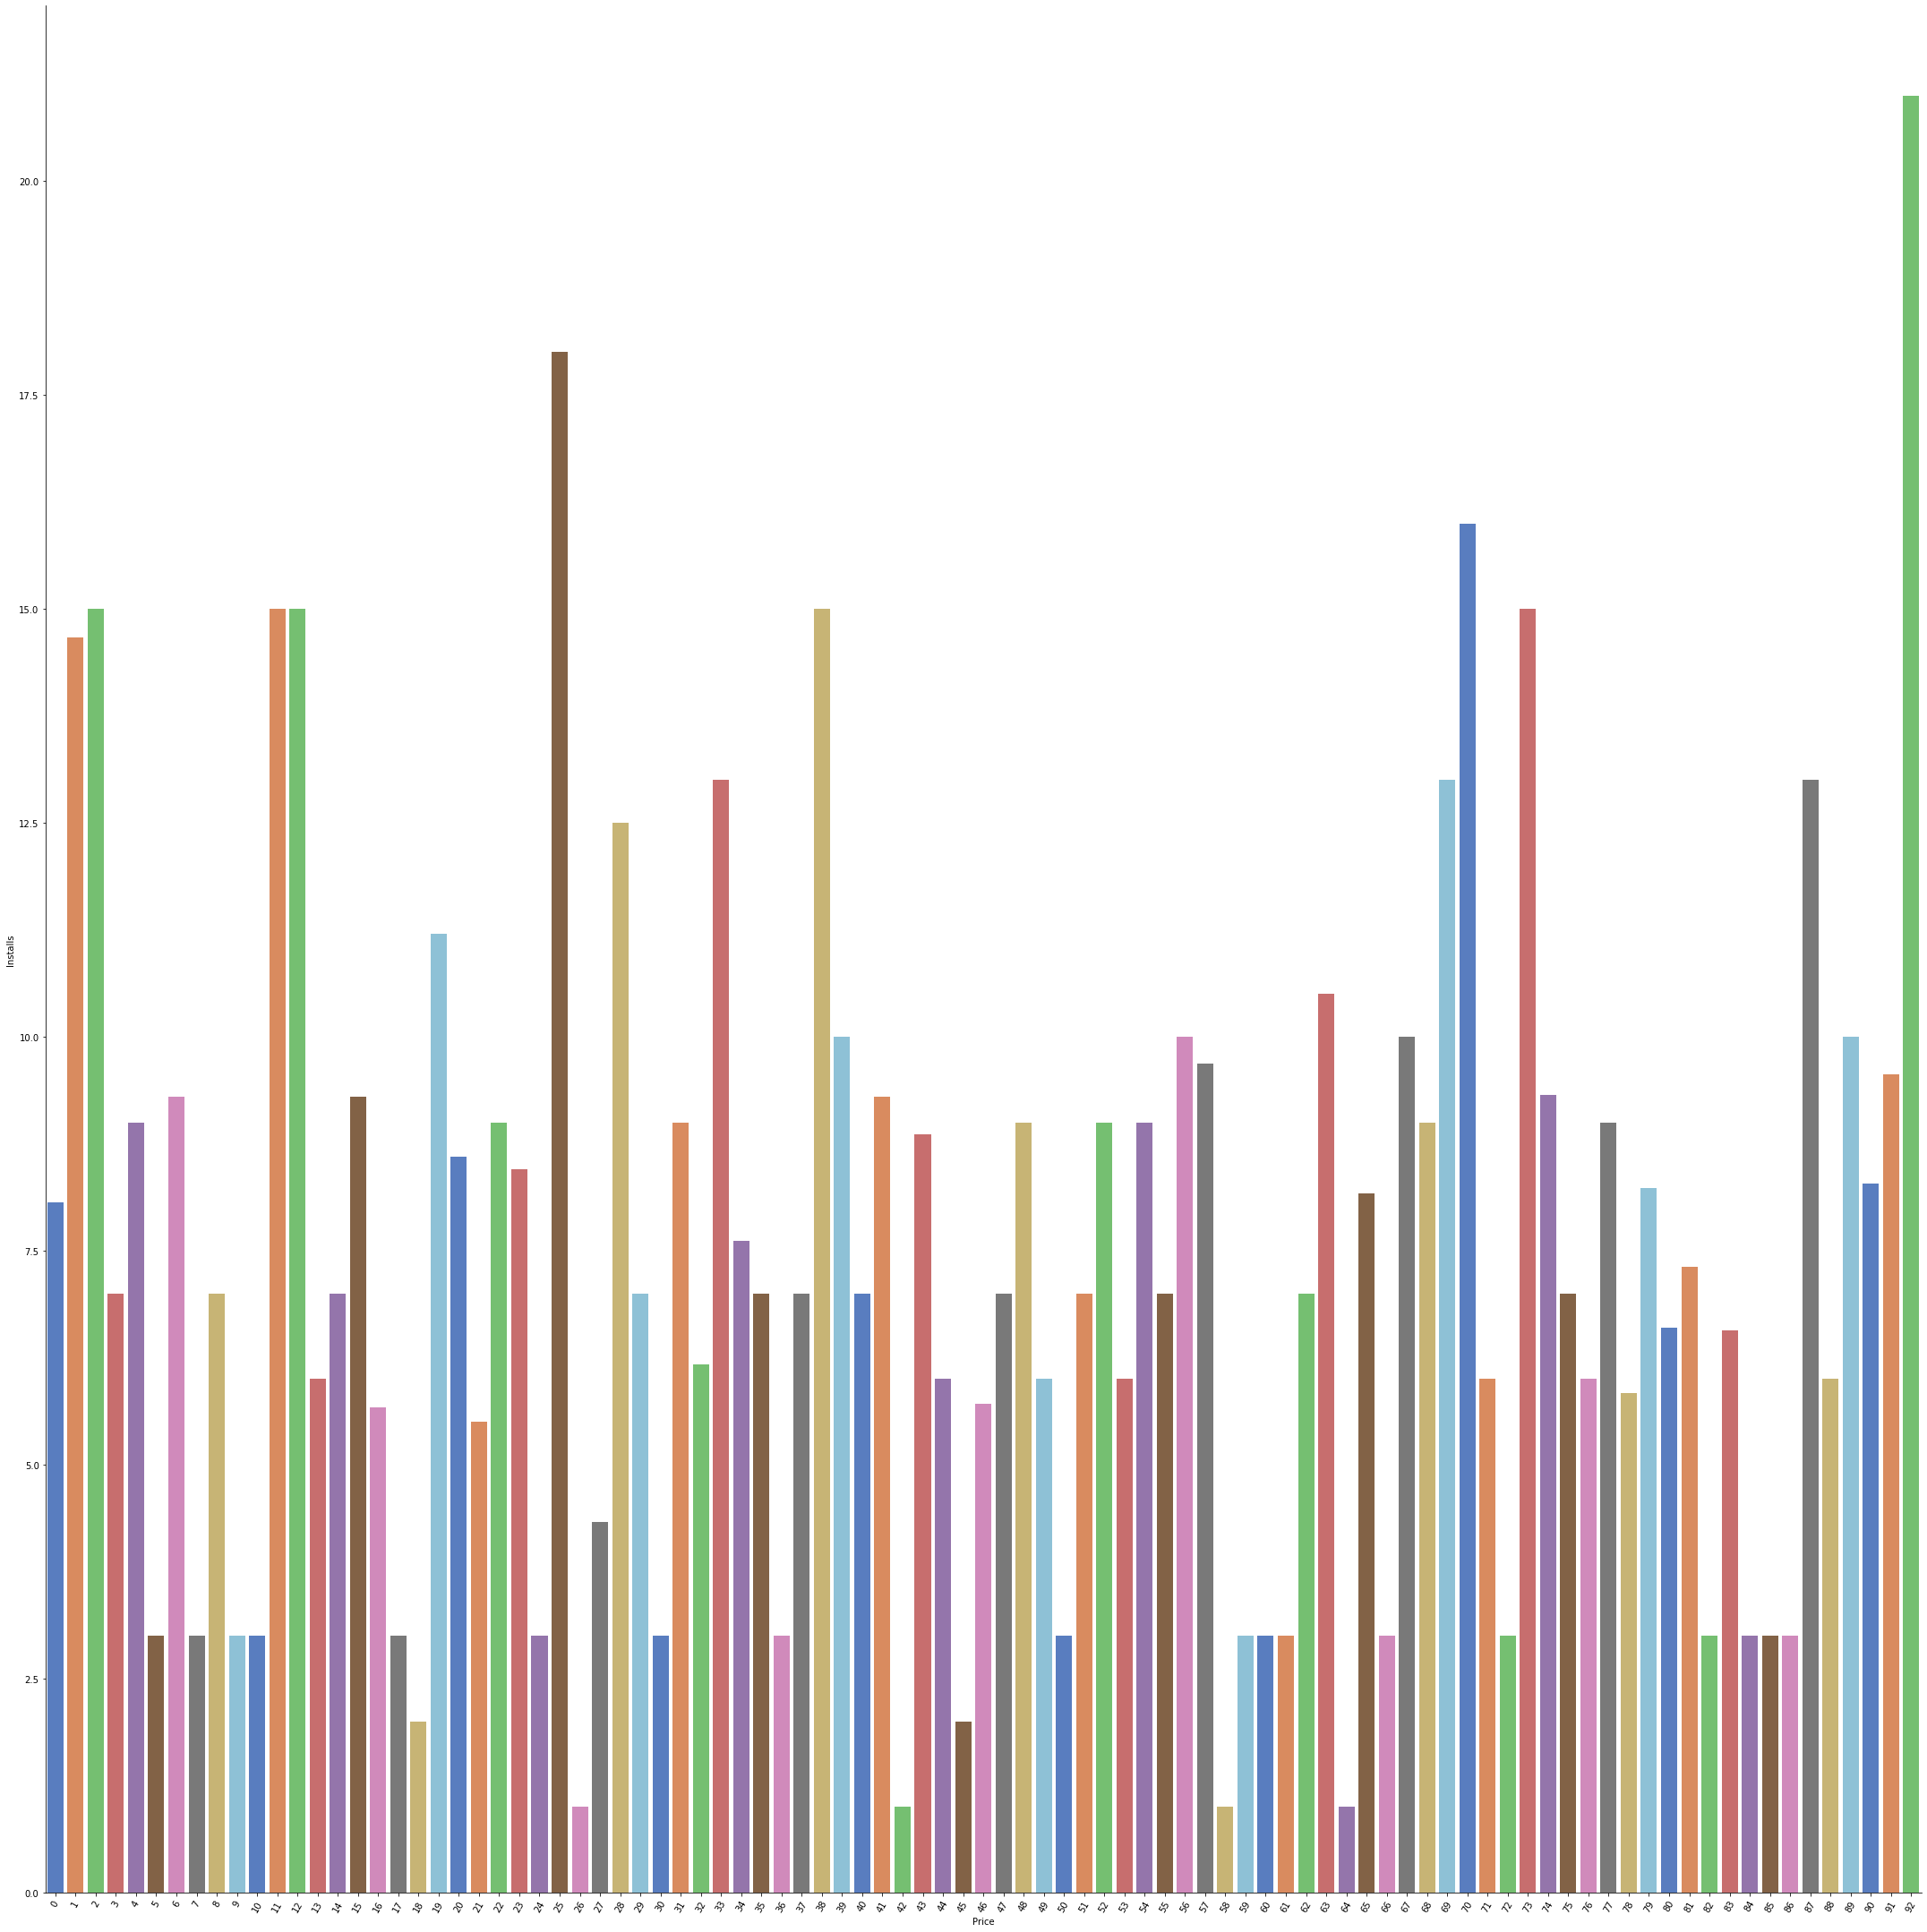

In [31]:
sns.catplot(x="Price", y="Installs", data=d, kind="bar",height=30, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

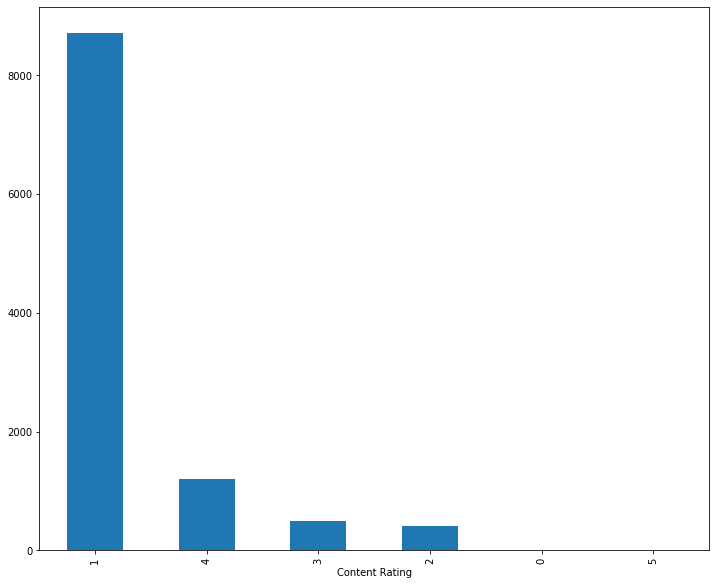

In [32]:
plt.figure(figsize=(12,10))
gl['Content Rating'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel("Content Rating")
plt.show()

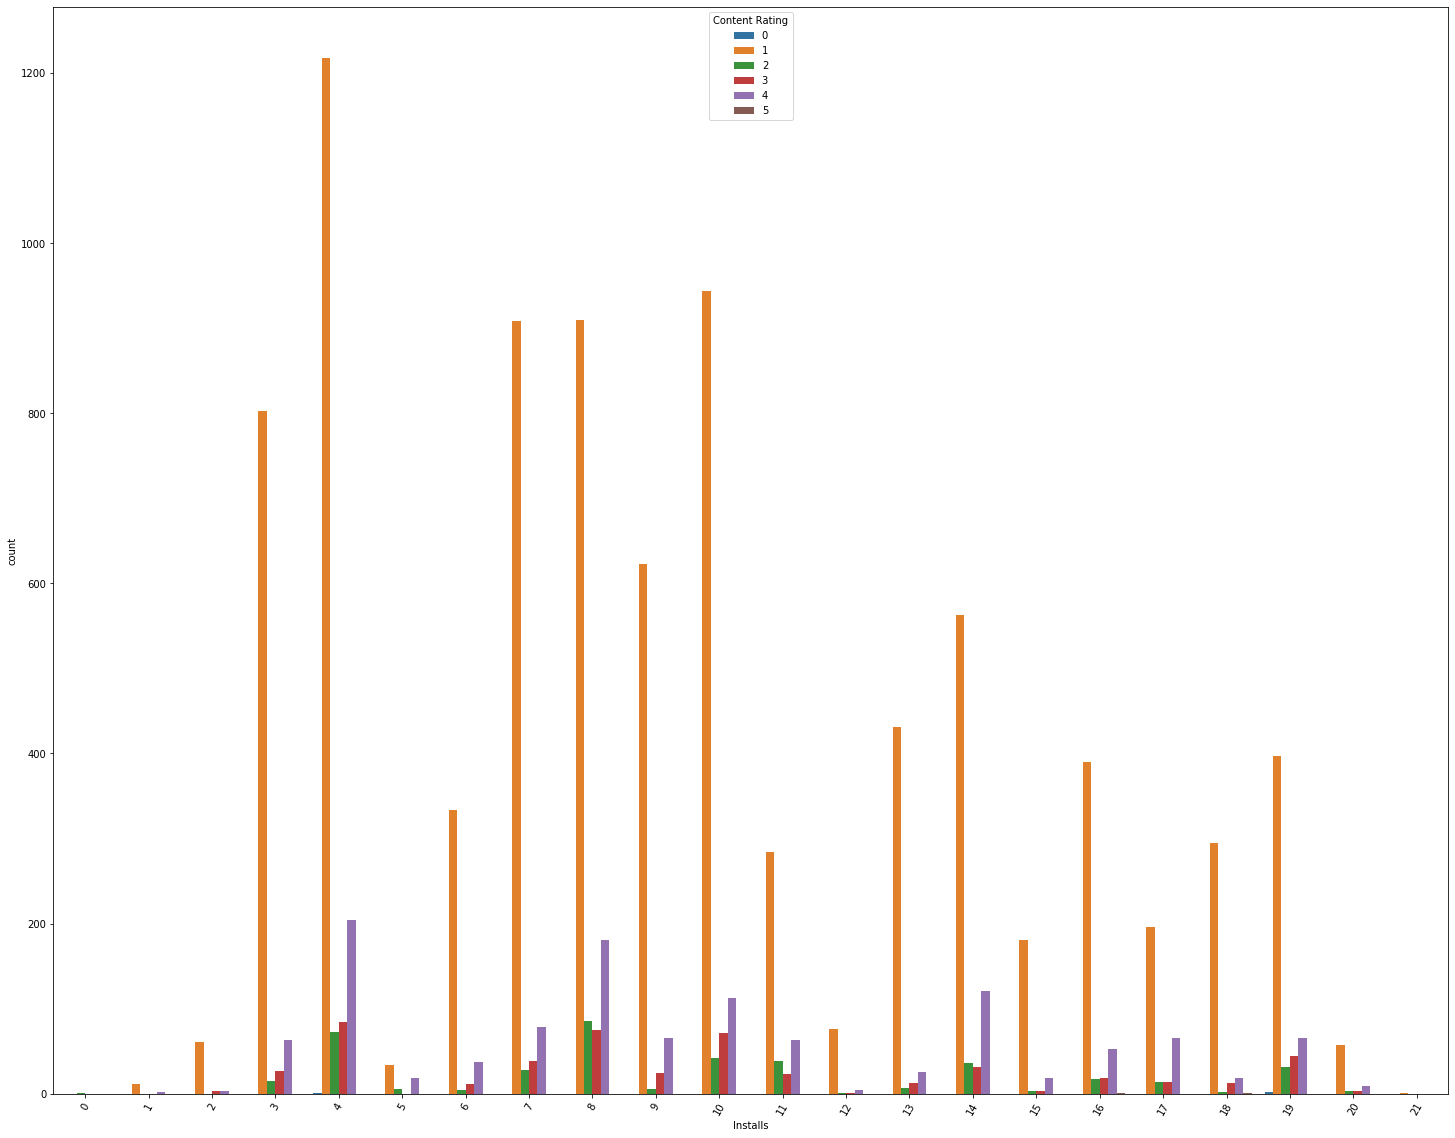

In [33]:
plt.figure(figsize=(25,20))
sns.countplot(x='Installs',hue='Content Rating',data=d)
plt.xticks(rotation=60)
plt.show()

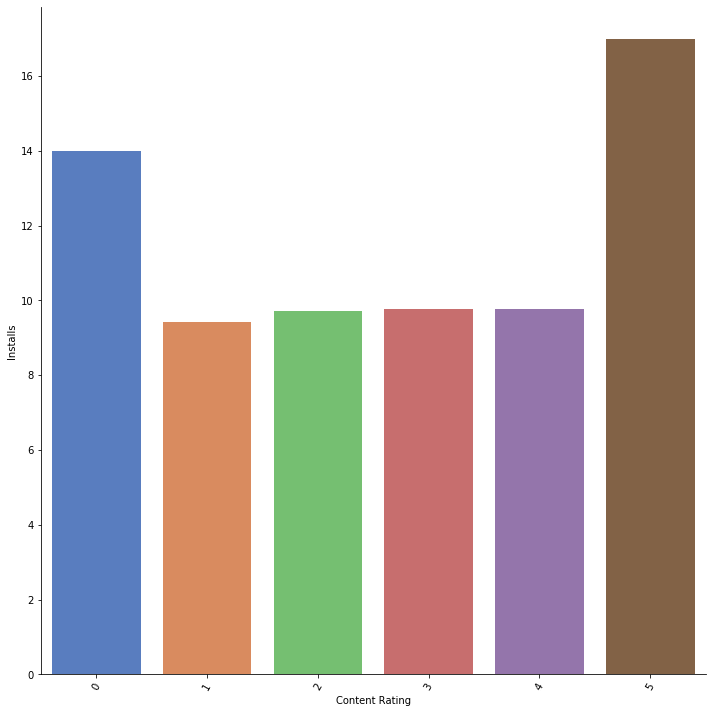

In [34]:
sns.catplot(x="Content Rating", y="Installs", data=d, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

In [35]:
d.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,1,4.1,1182,54,7,1,91,1,9
1,1,3.9,5923,28,19,1,91,1,12
2,1,4.7,5680,367,14,1,91,1,9
3,1,4.5,1946,100,17,1,91,4,9
4,1,4.3,5923,63,10,1,91,1,11


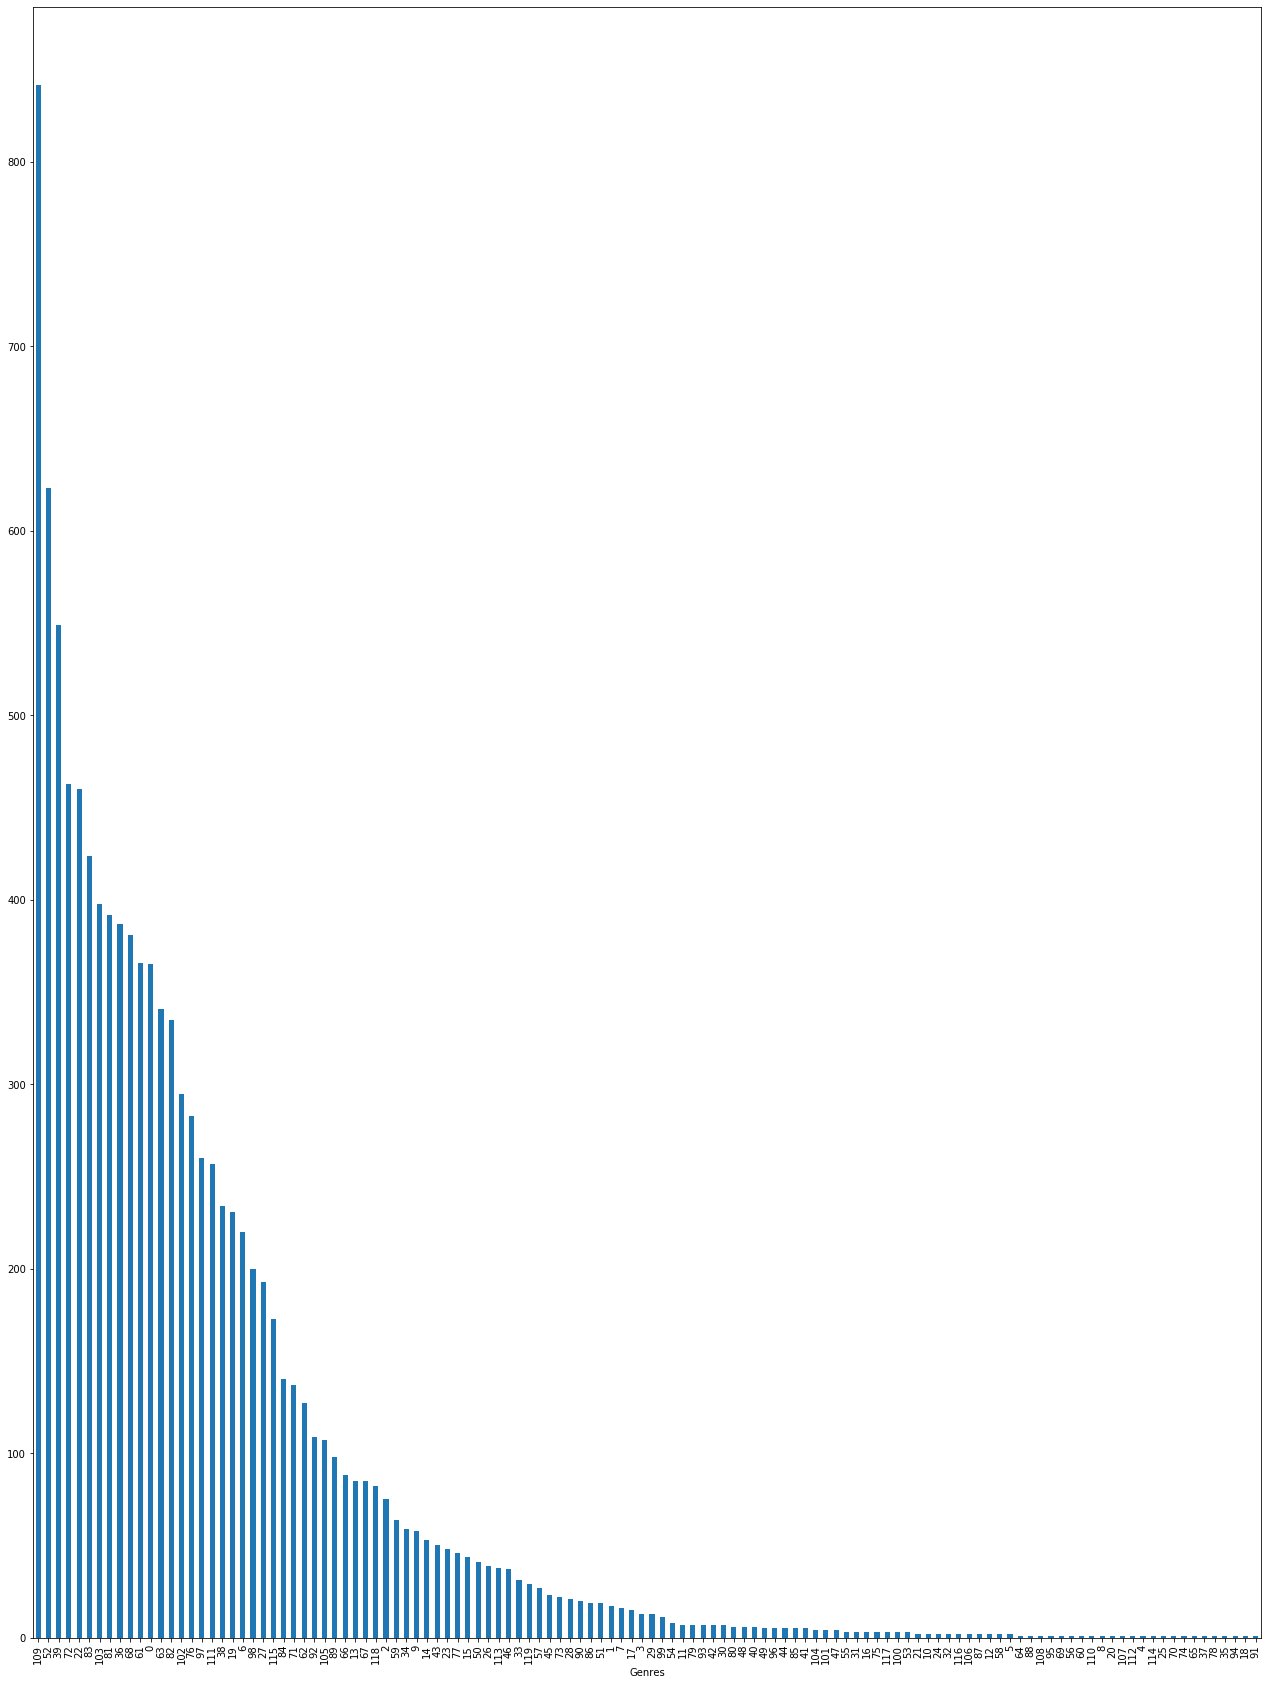

In [36]:
plt.figure(figsize=(22,30))
gl['Genres'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.show()

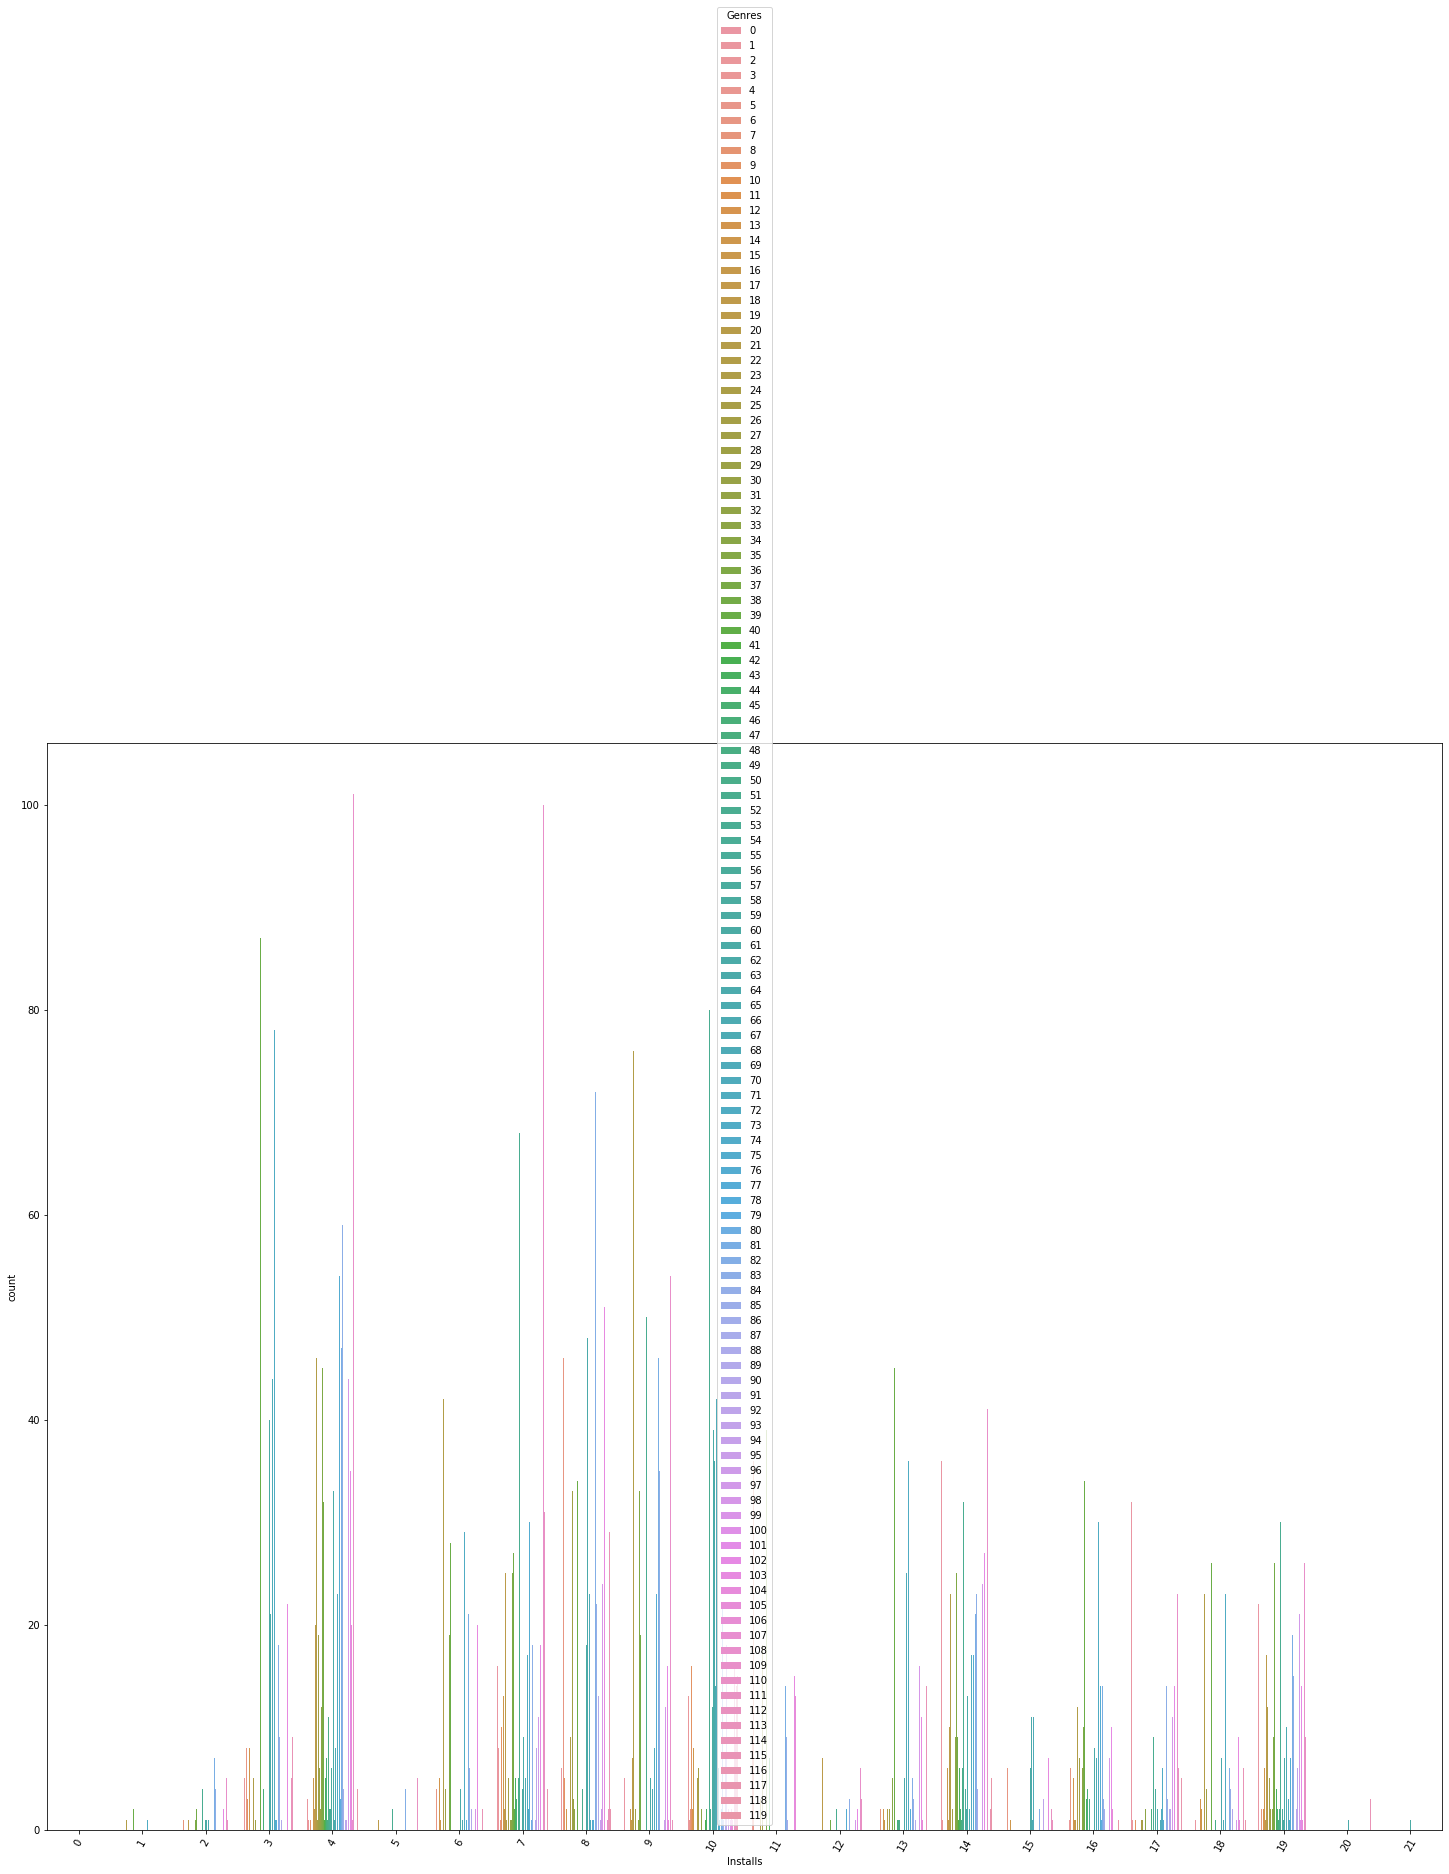

In [37]:
plt.figure(figsize=(25,20))
sns.countplot(x='Installs',hue='Genres',data=d)
plt.xticks(rotation=60)
plt.show()

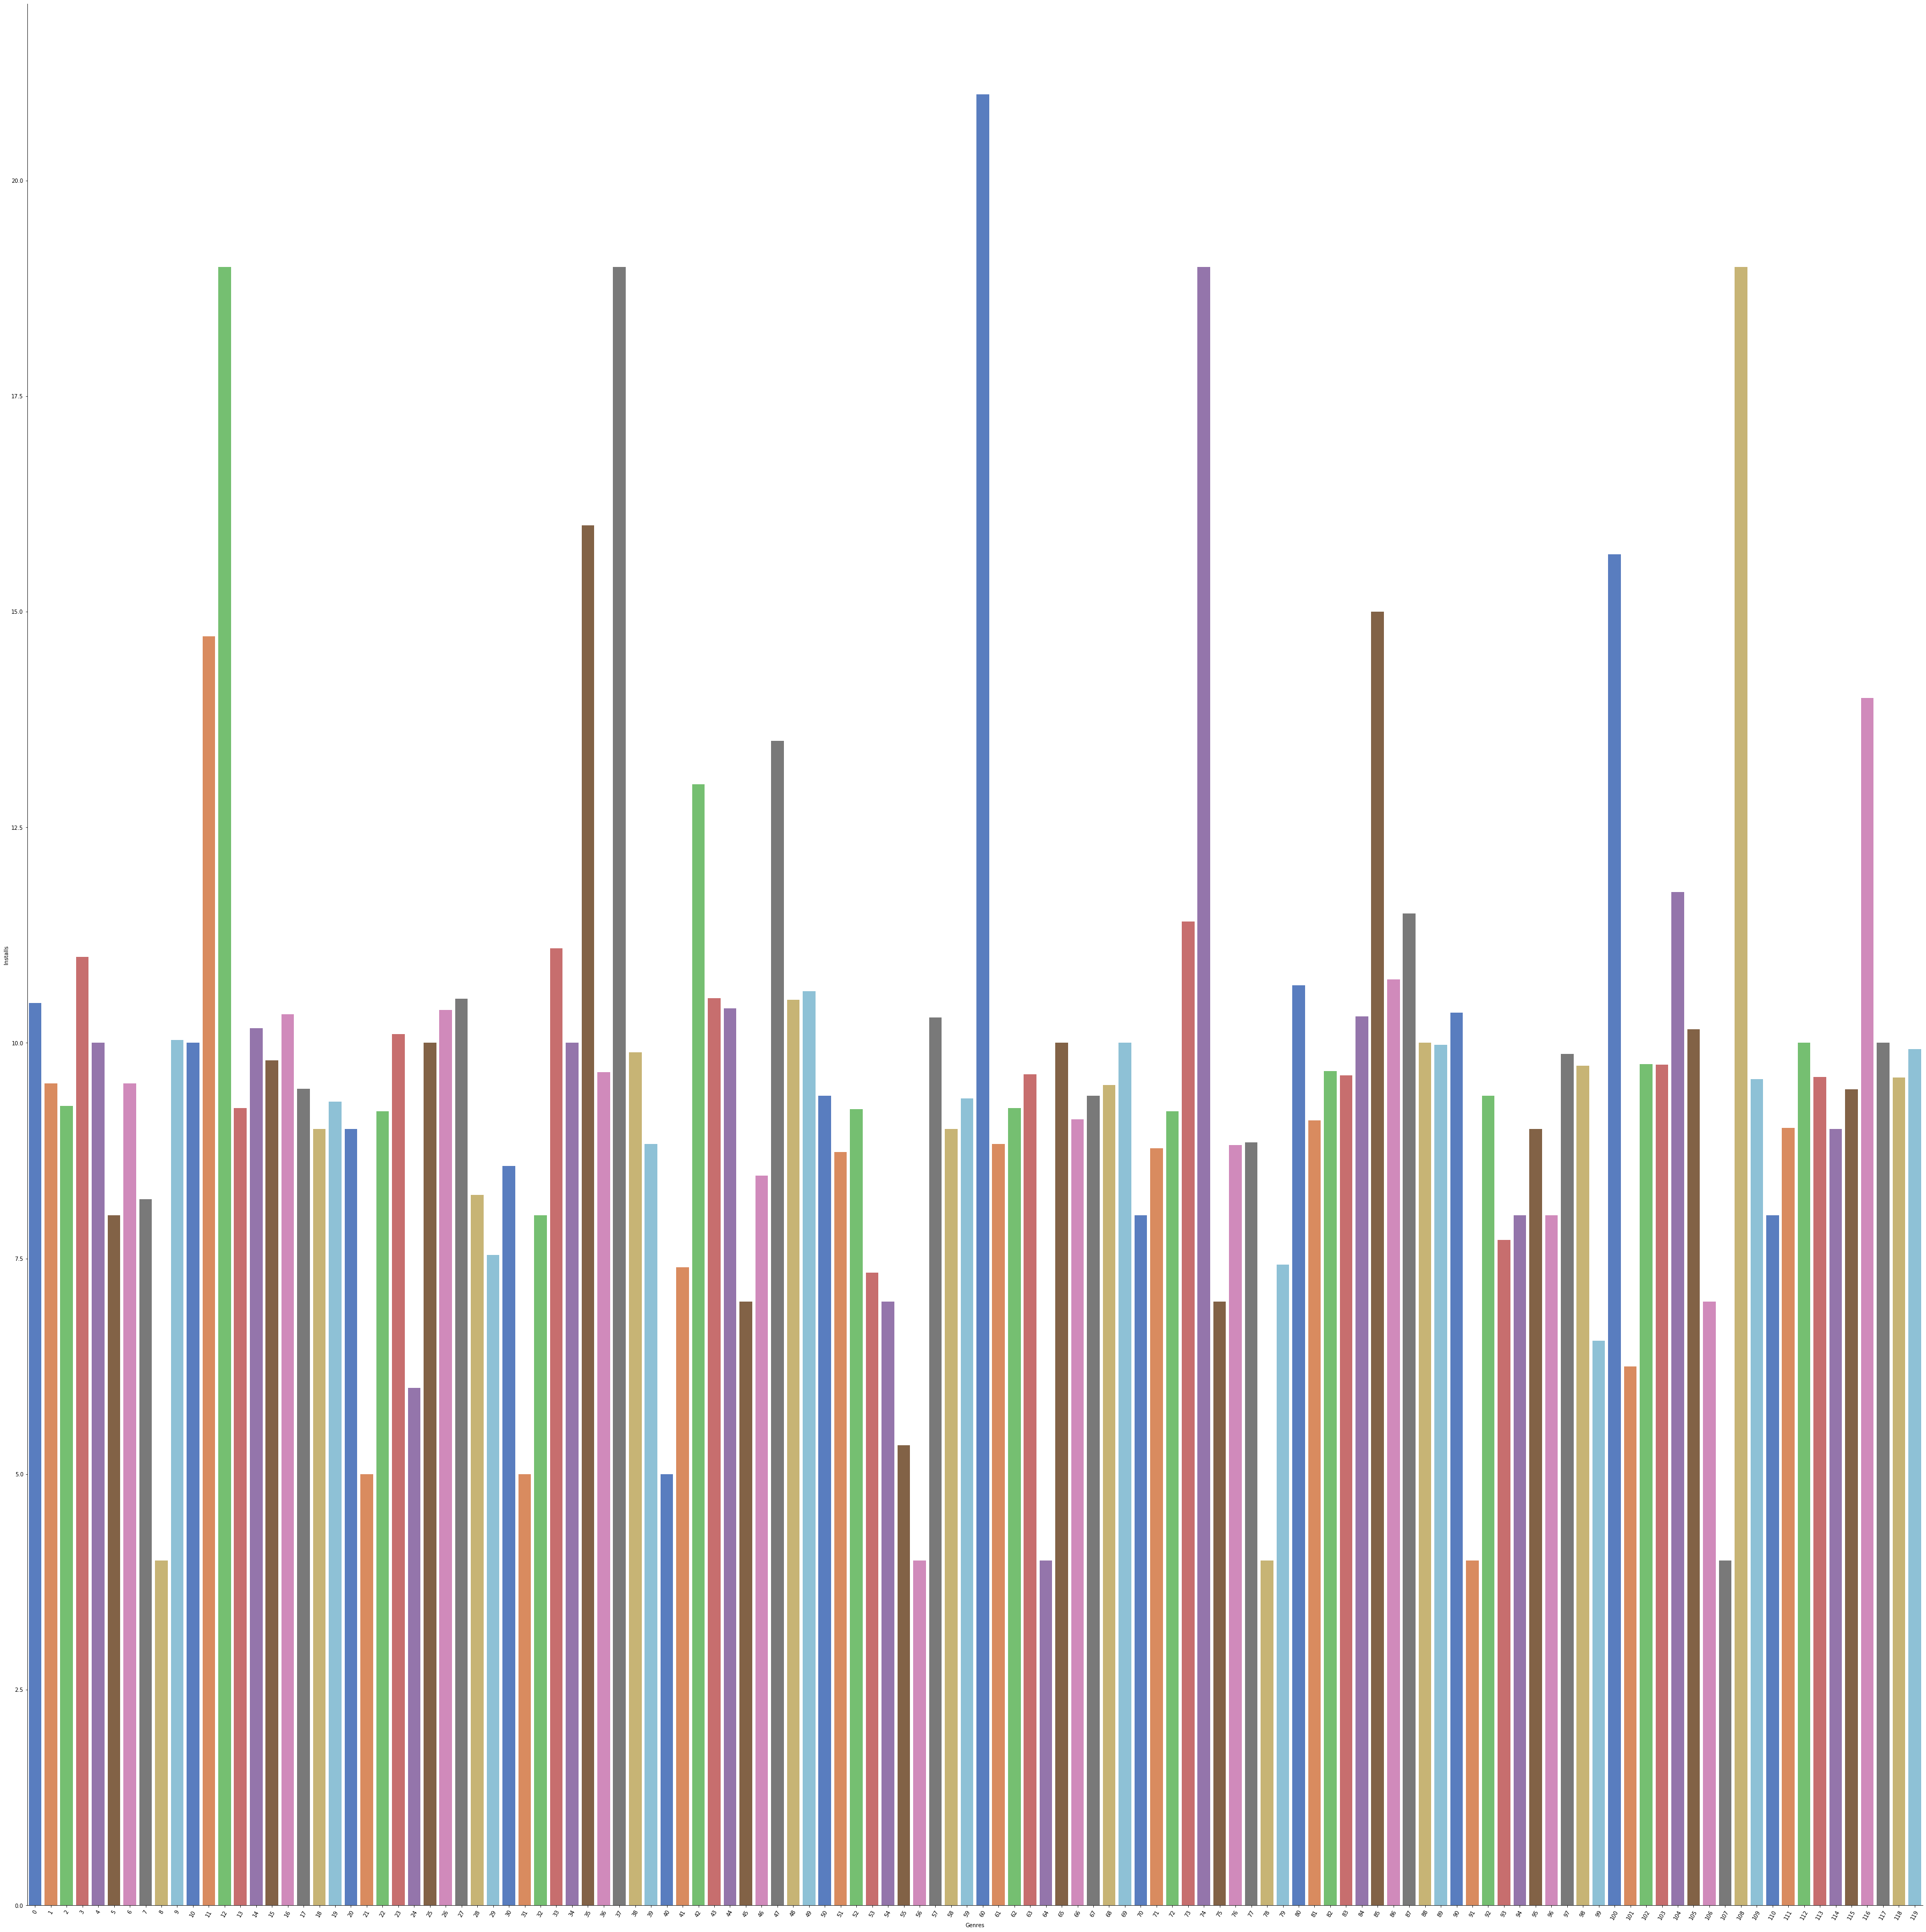

In [38]:
sns.catplot(x="Genres", y="Installs", data=d, kind="bar",height=50, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

In [39]:
d.describe()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000,10841.000000
mean,17.723734,4.190923,2743.178581,207.759155,9.487317,1.073702,87.083756,1.464994,64.875842
std,8.354659,0.557179,1836.390479,155.533112,4.826229,0.261650,15.974253,1.006114,33.059316
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,4.000000,1156.000000,71.000000,6.000000,1.000000,91.000000,1.000000,38.000000
50%,15.000000,4.300000,2746.000000,167.000000,9.000000,1.000000,91.000000,1.000000,68.000000
75%,26.000000,4.500000,4319.000000,344.000000,13.000000,1.000000,91.000000,1.000000,97.000000
max,33.000000,19.000000,6001.000000,461.000000,21.000000,2.000000,92.000000,5.000000,119.000000


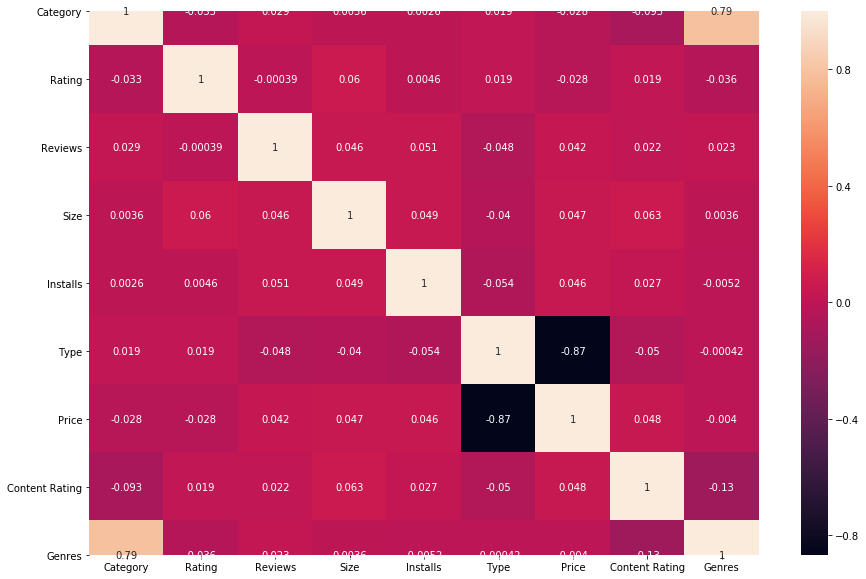

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(d.corr(),annot=True)
plt.show()

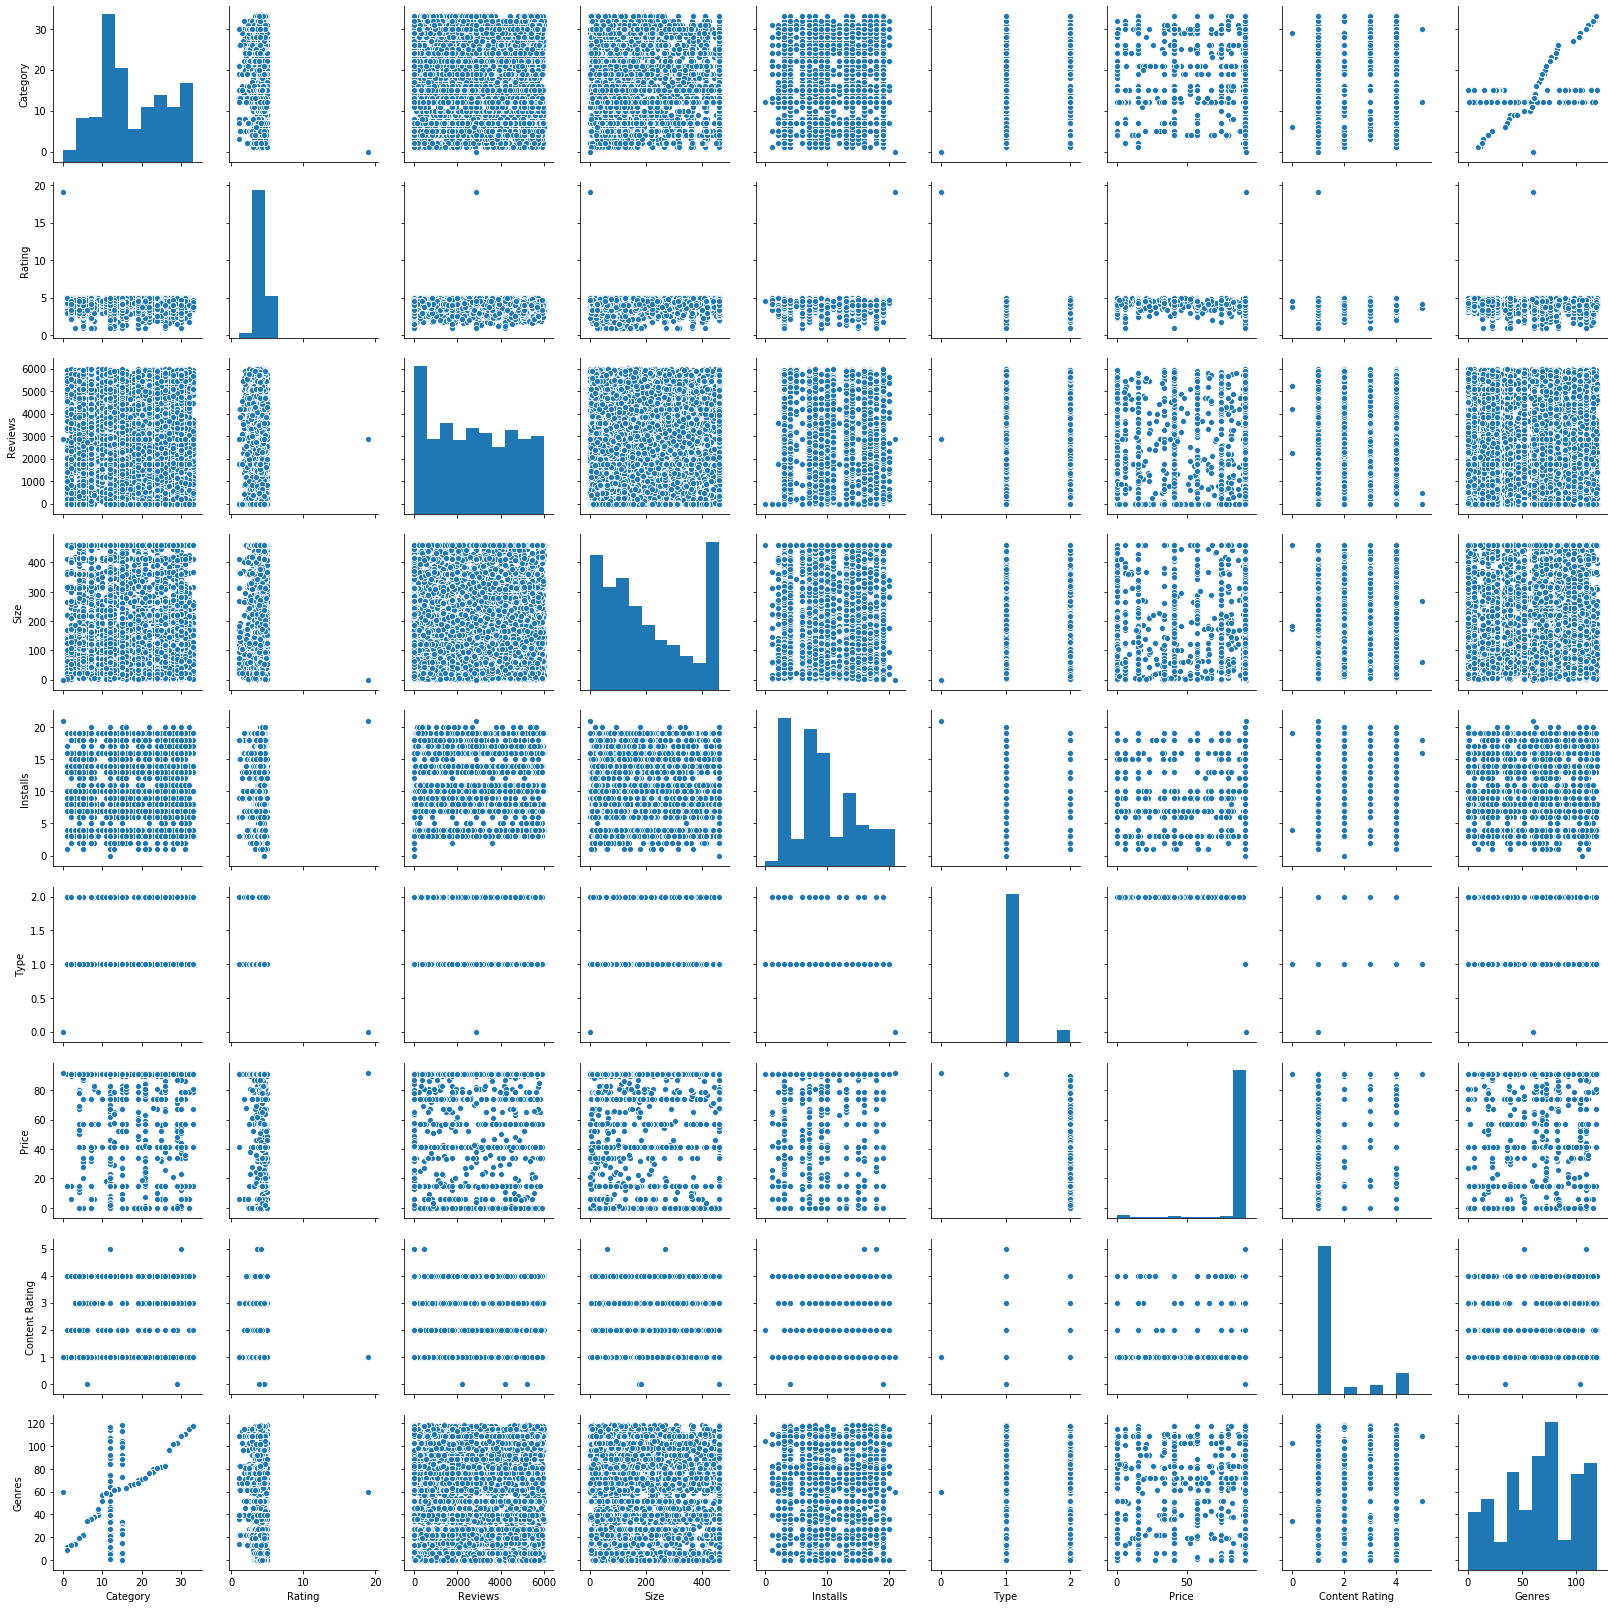

In [41]:
sns.pairplot(d)


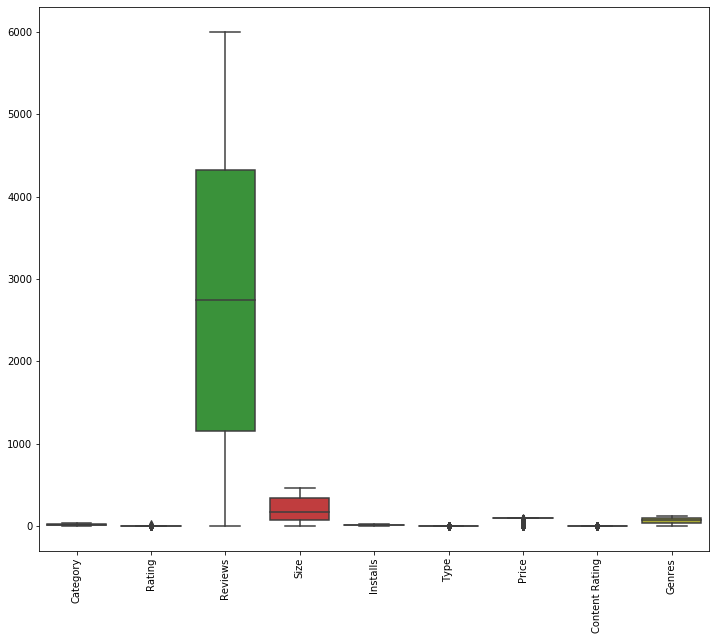

In [42]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
sns.boxplot(data=d)
plt.show()